## 라이브러리 import

In [1]:
import pandas as pd  # 데이터 분석
import numpy as np # 수치 계산
import datetime as dt # 날짜 형식
from glob import glob # 파일 경로
from dask import dataframe as dd # dask 로 대용량 파일 로드
from dask.diagnostics import ProgressBar # dask progress bar
import missingno as msno # 결측치 시각화
import squarify
import seaborn as sns # 데이터 시각화
import matplotlib.pyplot as plt # 데이터 시각화
import koreanize_matplotlib # 시각화 한글 폰트
%config InlineBackend.figure_format = 'retina'

## 파일 불러오기

In [2]:
files = glob('../Large Data Load/data/*.gzip')
files = sorted(files)
files

['../Large Data Load/data/2019-Oct-Nov.parquet.gzip',
 '../Large Data Load/data/brand-apple.parquet.gzip',
 '../Large Data Load/data/brand-samsung.parquet.gzip',
 '../Large Data Load/data/sub-df-0.parquet.gzip',
 '../Large Data Load/data/sub-df-1.parquet.gzip',
 '../Large Data Load/data/sub-df-2.parquet.gzip',
 '../Large Data Load/data/sub-df-3.parquet.gzip',
 '../Large Data Load/data/sub-df-4.parquet.gzip',
 '../Large Data Load/data/sub-df-5.parquet.gzip',
 '../Large Data Load/data/sub-df-6.parquet.gzip',
 '../Large Data Load/data/sub-df-7.parquet.gzip']

In [3]:
df = pd.read_parquet(files[0])
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,None,shiseido,35.790001,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.200001,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,None,543.099976,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.740005,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.979980,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...
109950738,2019-11-30 23:59:58 UTC,view,15700137,2053013559733912211,None,None,277.739990,532714000,02b4131c-0112-4231-aafa-ceaa08e77c1b
109950739,2019-11-30 23:59:58 UTC,view,28719425,2053013565639492569,apparel.shoes,baden,62.810001,545223467,734c5eef-0742-4f8b-9d22-48f75b0bc359
109950740,2019-11-30 23:59:59 UTC,view,1004833,2053013555631882655,electronics.smartphone,samsung,167.029999,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb
109950741,2019-11-30 23:59:59 UTC,view,2701706,2053013563911439225,appliances.kitchen.refrigerators,samsung,566.270020,531607492,368ddc8b-5db9-40fb-b7ff-b6582a1192c0


In [4]:
# 요약 확인하기
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109950743 entries, 0 to 109950742
Data columns (total 9 columns):
 #   Column         Non-Null Count      Dtype   
---  ------         --------------      -----   
 0   event_time     109950743 non-null  object  
 1   event_type     109950743 non-null  category
 2   product_id     109950743 non-null  uint32  
 3   category_id    109950743 non-null  uint64  
 4   category_code  74536963 non-null   object  
 5   brand          94609585 non-null   object  
 6   price          109950743 non-null  float32 
 7   user_id        109950743 non-null  uint32  
 8   user_session   109950731 non-null  object  
dtypes: category(1), float32(1), object(4), uint32(2), uint64(1)
memory usage: 5.4+ GB


In [5]:
# 중복 제거하기
df = df.drop_duplicates(keep='first')
df.shape

(109820004, 9)

In [6]:
df = df.copy()

In [7]:
# 날짜 형식 변환하기
df['event_time'] = pd.to_datetime(df['event_time'].str[:-4])
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00,view,44600062,2103807459595387724,None,shiseido,35.790001,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.200001,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01,view,17200506,2053013559792632471,furniture.living_room.sofa,None,543.099976,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01,view,1307067,2053013558920217191,computers.notebook,lenovo,251.740005,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.979980,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [8]:
# 월, 일, 월일 파생변수 생성
df['month'] = df['event_time'].dt.month #월
df['day'] = df['event_time'].dt.day #일
df['md'] = df['event_time'].astype(str).str[5:10] #월일
df.tail(1)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,month,day,md
109950742,2019-11-30 23:59:59,view,1004233,2053013555631882655,electronics.smartphone,apple,1312.52002,579969851,90aca71c-ed8a-4670-866a-761ebacb732d,11,30,11-30


## 변수 살펴보기

In [9]:
# user 수
df_user = df['user_id'].nunique()
df_user

5316649

In [10]:
# product 수
df_product = df['product_id'].nunique()
df_product

206876

In [12]:
# event 수
df_events = df['event_type'].value_counts()
df_events

event_type
view        104331840
cart          3828461
purchase      1659703
Name: count, dtype: int64

In [28]:
# category 수
categories = df['category_code'].value_counts()
df_cat = categories.head(10)
df_cat

category_code
electronics.smartphone              27822618
electronics.clocks                   3396153
electronics.video.tv                 3316460
computers.notebook                   3316047
electronics.audio.headphone          2913014
apparel.shoes                        2649666
appliances.environment.vacuum        2326526
appliances.kitchen.refrigerators     2312324
appliances.kitchen.washer            2268440
computers.desktop                    1114429
Name: count, dtype: int64

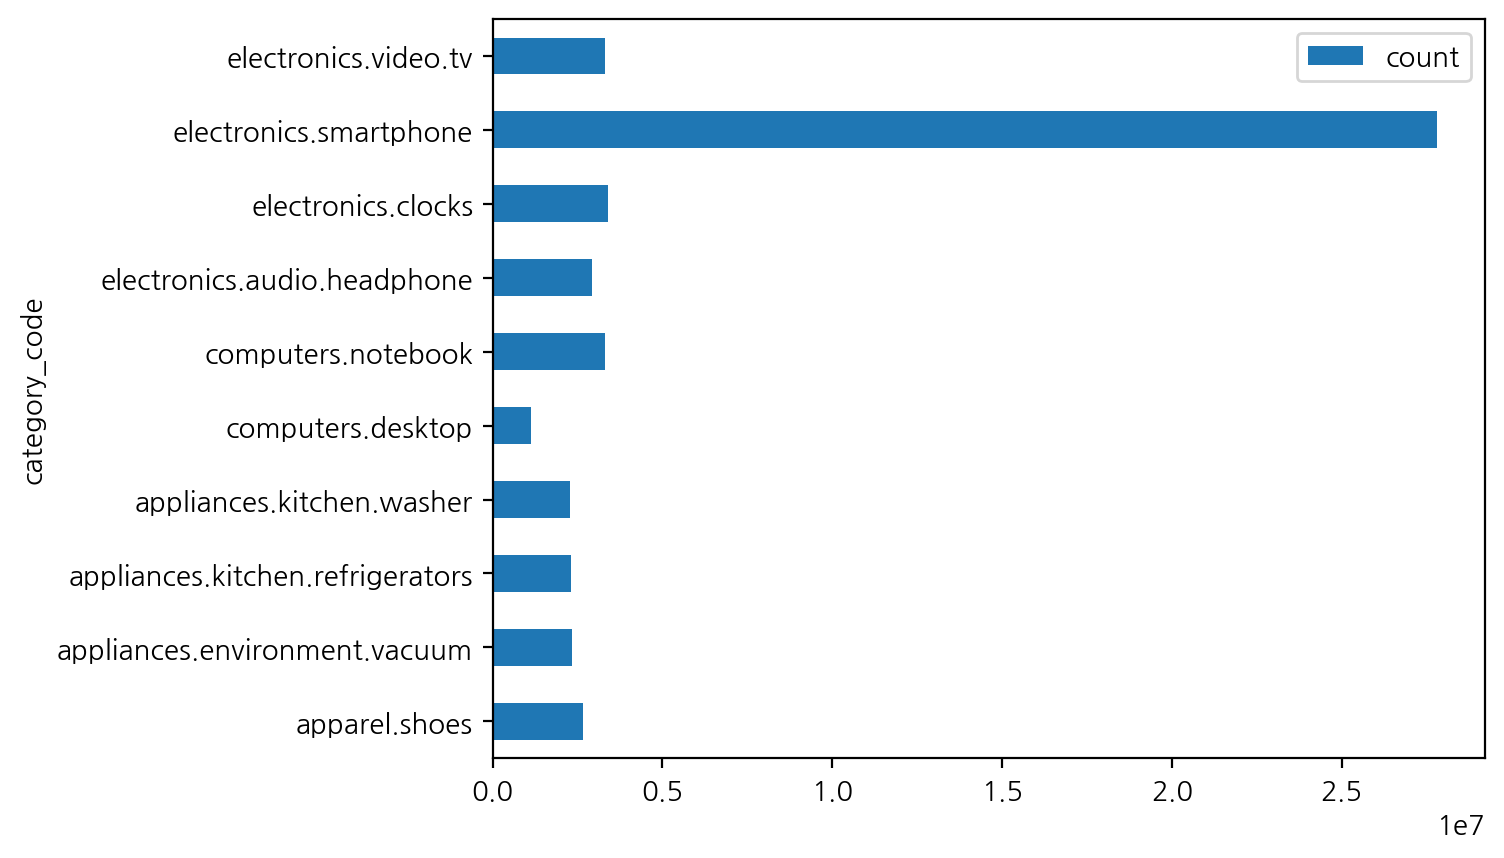

In [33]:
pd.DataFrame(df_cat).rename({'brand':'count'}).sort_values(by=['category_code'], ascending=True).plot(kind='barh');

## 전체 세션 분석

In [36]:
# 세션 비중 구하기
df_per_events = df['event_type'].value_counts(normalize=True) * 100
df_per_events

event_type
view        95.002583
cart         3.486124
purchase     1.511294
Name: proportion, dtype: float64

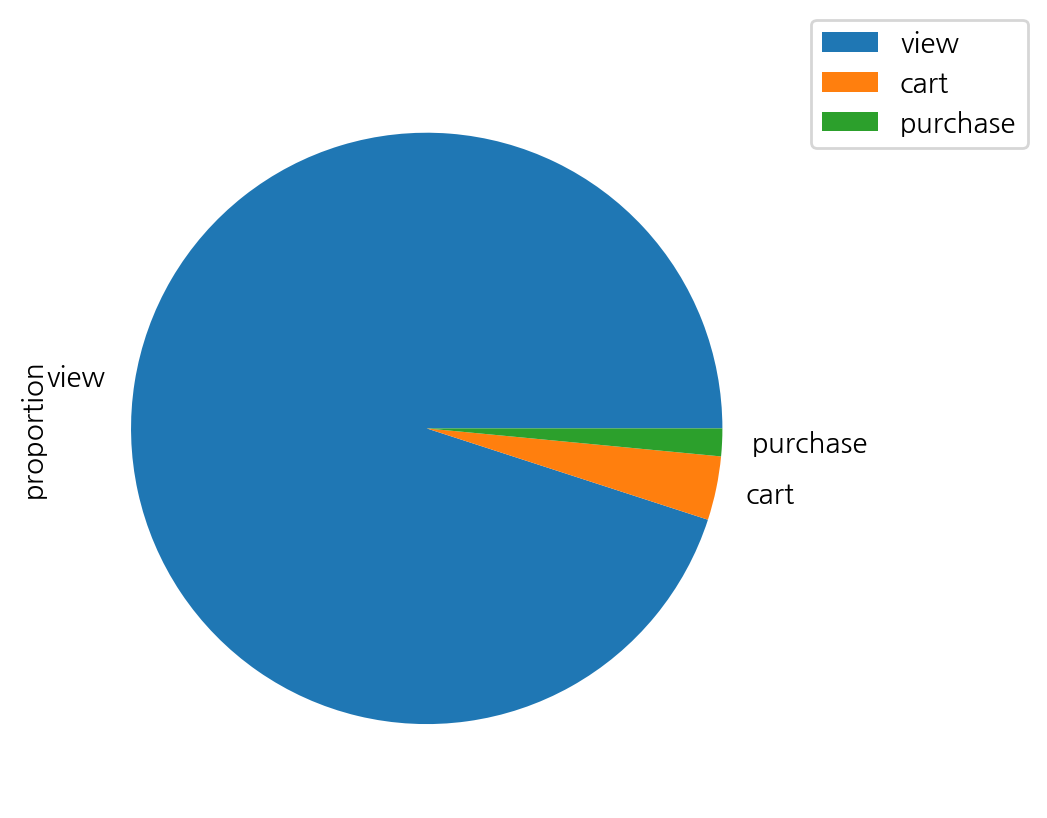

In [42]:
pd.DataFrame(df_per_events).plot.pie(y='proportion');
plt.legend(loc=(1.02, 0.88))
plt.show()

### 구매(purchase) 세션 분석

In [43]:
df_purchase = df[df['event_type'] == 'purchase']
df_purchase

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,month,day,md
162,2019-10-01 00:02:14,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.759995,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564,10,1,10-01
308,2019-10-01 00:04:37,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.690002,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,10,1,10-01
379,2019-10-01 00:06:02,purchase,5100816,2053013553375346967,None,xiaomi,29.510000,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56,10,1,10-01
442,2019-10-01 00:07:07,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.419998,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f,10,1,10-01
574,2019-10-01 00:09:26,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.910004,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553,10,1,10-01
...,...,...,...,...,...,...,...,...,...,...,...,...
109950489,2019-11-30 23:58:14,purchase,1004874,2053013555631882655,electronics.smartphone,samsung,346.700012,547804983,717566cf-ef93-4078-ba8f-169a3ac9f1a0,11,30,11-30
109950509,2019-11-30 23:58:22,purchase,1005130,2053013555631882655,electronics.smartphone,apple,1437.020020,515582054,829c20b5-696e-4a8a-8a9f-171014a3ecbe,11,30,11-30
109950588,2019-11-30 23:58:57,purchase,1004767,2053013555631882655,electronics.smartphone,samsung,235.600006,579876821,ca50e291-43f3-4ca2-9e13-20ee6b8b25f0,11,30,11-30
109950627,2019-11-30 23:59:15,purchase,3701309,2053013565983425517,appliances.environment.vacuum,polaris,89.320000,543733099,a65116f4-ac53-4a41-ad68-6606788e674c,11,30,11-30


In [44]:
df_purchase.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1659703 entries, 162 to 109950708
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   event_time     1659703 non-null  datetime64[ns]
 1   event_type     1659703 non-null  category      
 2   product_id     1659703 non-null  uint32        
 3   category_id    1659703 non-null  uint64        
 4   category_code  1252078 non-null  object        
 5   brand          1528041 non-null  object        
 6   price          1659703 non-null  float32       
 7   user_id        1659703 non-null  uint32        
 8   user_session   1659703 non-null  object        
 9   month          1659703 non-null  int32         
 10  day            1659703 non-null  int32         
 11  md             1659703 non-null  object        
dtypes: category(1), datetime64[ns](1), float32(1), int32(2), object(4), uint32(2), uint64(1)
memory usage: 121.9+ MB


In [45]:
# 결측치 확인하기
df_purchase['user_session'].isnull().sum()

0

In [46]:
purchase_count = df_purchase[['event_type','md','product_id','user_id','category_code', 'price']]
purchase_count.head()

,event_type,md,product_id,user_id,category_code,price
162,purchase,10-01,1004856,543272936,electronics.smartphone,130.759995
308,purchase,10-01,1002532,551377651,electronics.smartphone,642.690002
379,purchase,10-01,5100816,514591159,None,29.510000
442,purchase,10-01,13800054,555332717,furniture.bathroom.toilet,54.419998
574,purchase,10-01,4804055,524601178,electronics.audio.headphone,189.910004


In [47]:
# 결측치 제거하기
purchase_count = purchase_count.dropna()
purchase_count

,event_type,md,product_id,user_id,category_code,price
162,purchase,10-01,1004856,543272936,electronics.smartphone,130.759995
308,purchase,10-01,1002532,551377651,electronics.smartphone,642.690002
442,purchase,10-01,13800054,555332717,furniture.bathroom.toilet,54.419998
574,purchase,10-01,4804055,524601178,electronics.audio.headphone,189.910004
603,purchase,10-01,4804056,551377651,electronics.audio.headphone,161.979996
...,...,...,...,...,...,...
109950480,purchase,11-30,1004767,574868869,electronics.smartphone,235.600006
109950489,purchase,11-30,1004874,547804983,electronics.smartphone,346.700012
109950509,purchase,11-30,1005130,515582054,electronics.smartphone,1437.020020
109950588,purchase,11-30,1004767,579876821,electronics.smartphone,235.600006


In [48]:
purchase_count_m = purchase_count.groupby('user_id').agg({'md':'nunique',
                                                          'event_type':'count',
                                                          'category_code':'unique',
                                                          'price':'sum'})
purchase_count_m

,md,event_type,category_code,price
user_id,,,,
225644257,1,1,[computers.components.hdd],40.910000
253299396,1,1,[appliances.kitchen.hood],246.850006
256164170,1,1,[appliances.environment.water_heater],113.230003
296197073,1,1,[auto.accessories.videoregister],51.459999
299358698,1,1,[electronics.smartphone],154.190002
...,...,...,...,...
579962677,1,1,[electronics.smartphone],1634.380005
579963523,1,1,[electronics.smartphone],457.910004
579964521,1,1,[computers.notebook],334.600006


In [49]:
purchase_count_m['category_code'] = purchase_count_m['category_code'].astype('str').str[1:-1]
purchase_count_m

,md,event_type,category_code,price
user_id,,,,
225644257,1,1,'computers.components.hdd',40.910000
253299396,1,1,'appliances.kitchen.hood',246.850006
256164170,1,1,'appliances.environment.water_heater',113.230003
296197073,1,1,'auto.accessories.videoregister',51.459999
299358698,1,1,'electronics.smartphone',154.190002
...,...,...,...,...
579962677,1,1,'electronics.smartphone',1634.380005
579963523,1,1,'electronics.smartphone',457.910004
579964521,1,1,'computers.notebook',334.600006


In [50]:
purchase_count_m = purchase_count_m.sort_values(by=['price'], ascending=False)
purchase_count_m

,md,event_type,category_code,price
user_id,,,,
512386086,60,589,'electronics.video.tv' 'appliances.kitchen.ref...,343899.09375
515384420,45,178,'electronics.smartphone',302305.68750
513117637,35,204,'electronics.smartphone' 'electronics.audio.he...,265857.71875
519267944,29,183,'electronics.smartphone' 'electronics.audio.he...,265569.53125
518514099,8,198,'electronics.smartphone' 'appliances.sewing_ma...,202751.28125
...,...,...,...,...
512893344,1,1,'electronics.audio.headphone',0.88000
513377188,1,1,'electronics.audio.headphone',0.88000
524830675,1,1,'electronics.audio.headphone',0.87000


In [52]:
event_type_count = df[['event_type','md','product_id','user_id']]
event_type_count.head()

,event_type,md,product_id,user_id
0,view,10-01,44600062,541312140
1,view,10-01,3900821,554748717
2,view,10-01,17200506,519107250
3,view,10-01,1307067,550050854
4,view,10-01,1004237,535871217


In [53]:
item = event_type_count.groupby(['md','event_type']).agg({'product_id':'count'})
item = item.reset_index()
item

,md,event_type,product_id
0,10-01,cart,16193
1,10-01,purchase,19305
2,10-01,view,1208217
3,10-02,cart,16871
4,10-02,purchase,19469
...,...,...,...
178,11-29,purchase,32107
179,11-29,view,1729884
180,11-30,cart,79528
181,11-30,purchase,28178


In [54]:
# 11월 시작 행 찾기
item[item['md'] == '11-01']

,md,event_type,product_id
93,11-01,cart,18349
94,11-01,purchase,22457
95,11-01,view,1403948


In [55]:
# 데이터  자르기
Oct_item = item.loc[:92]
Nov_item = item.loc[93:]

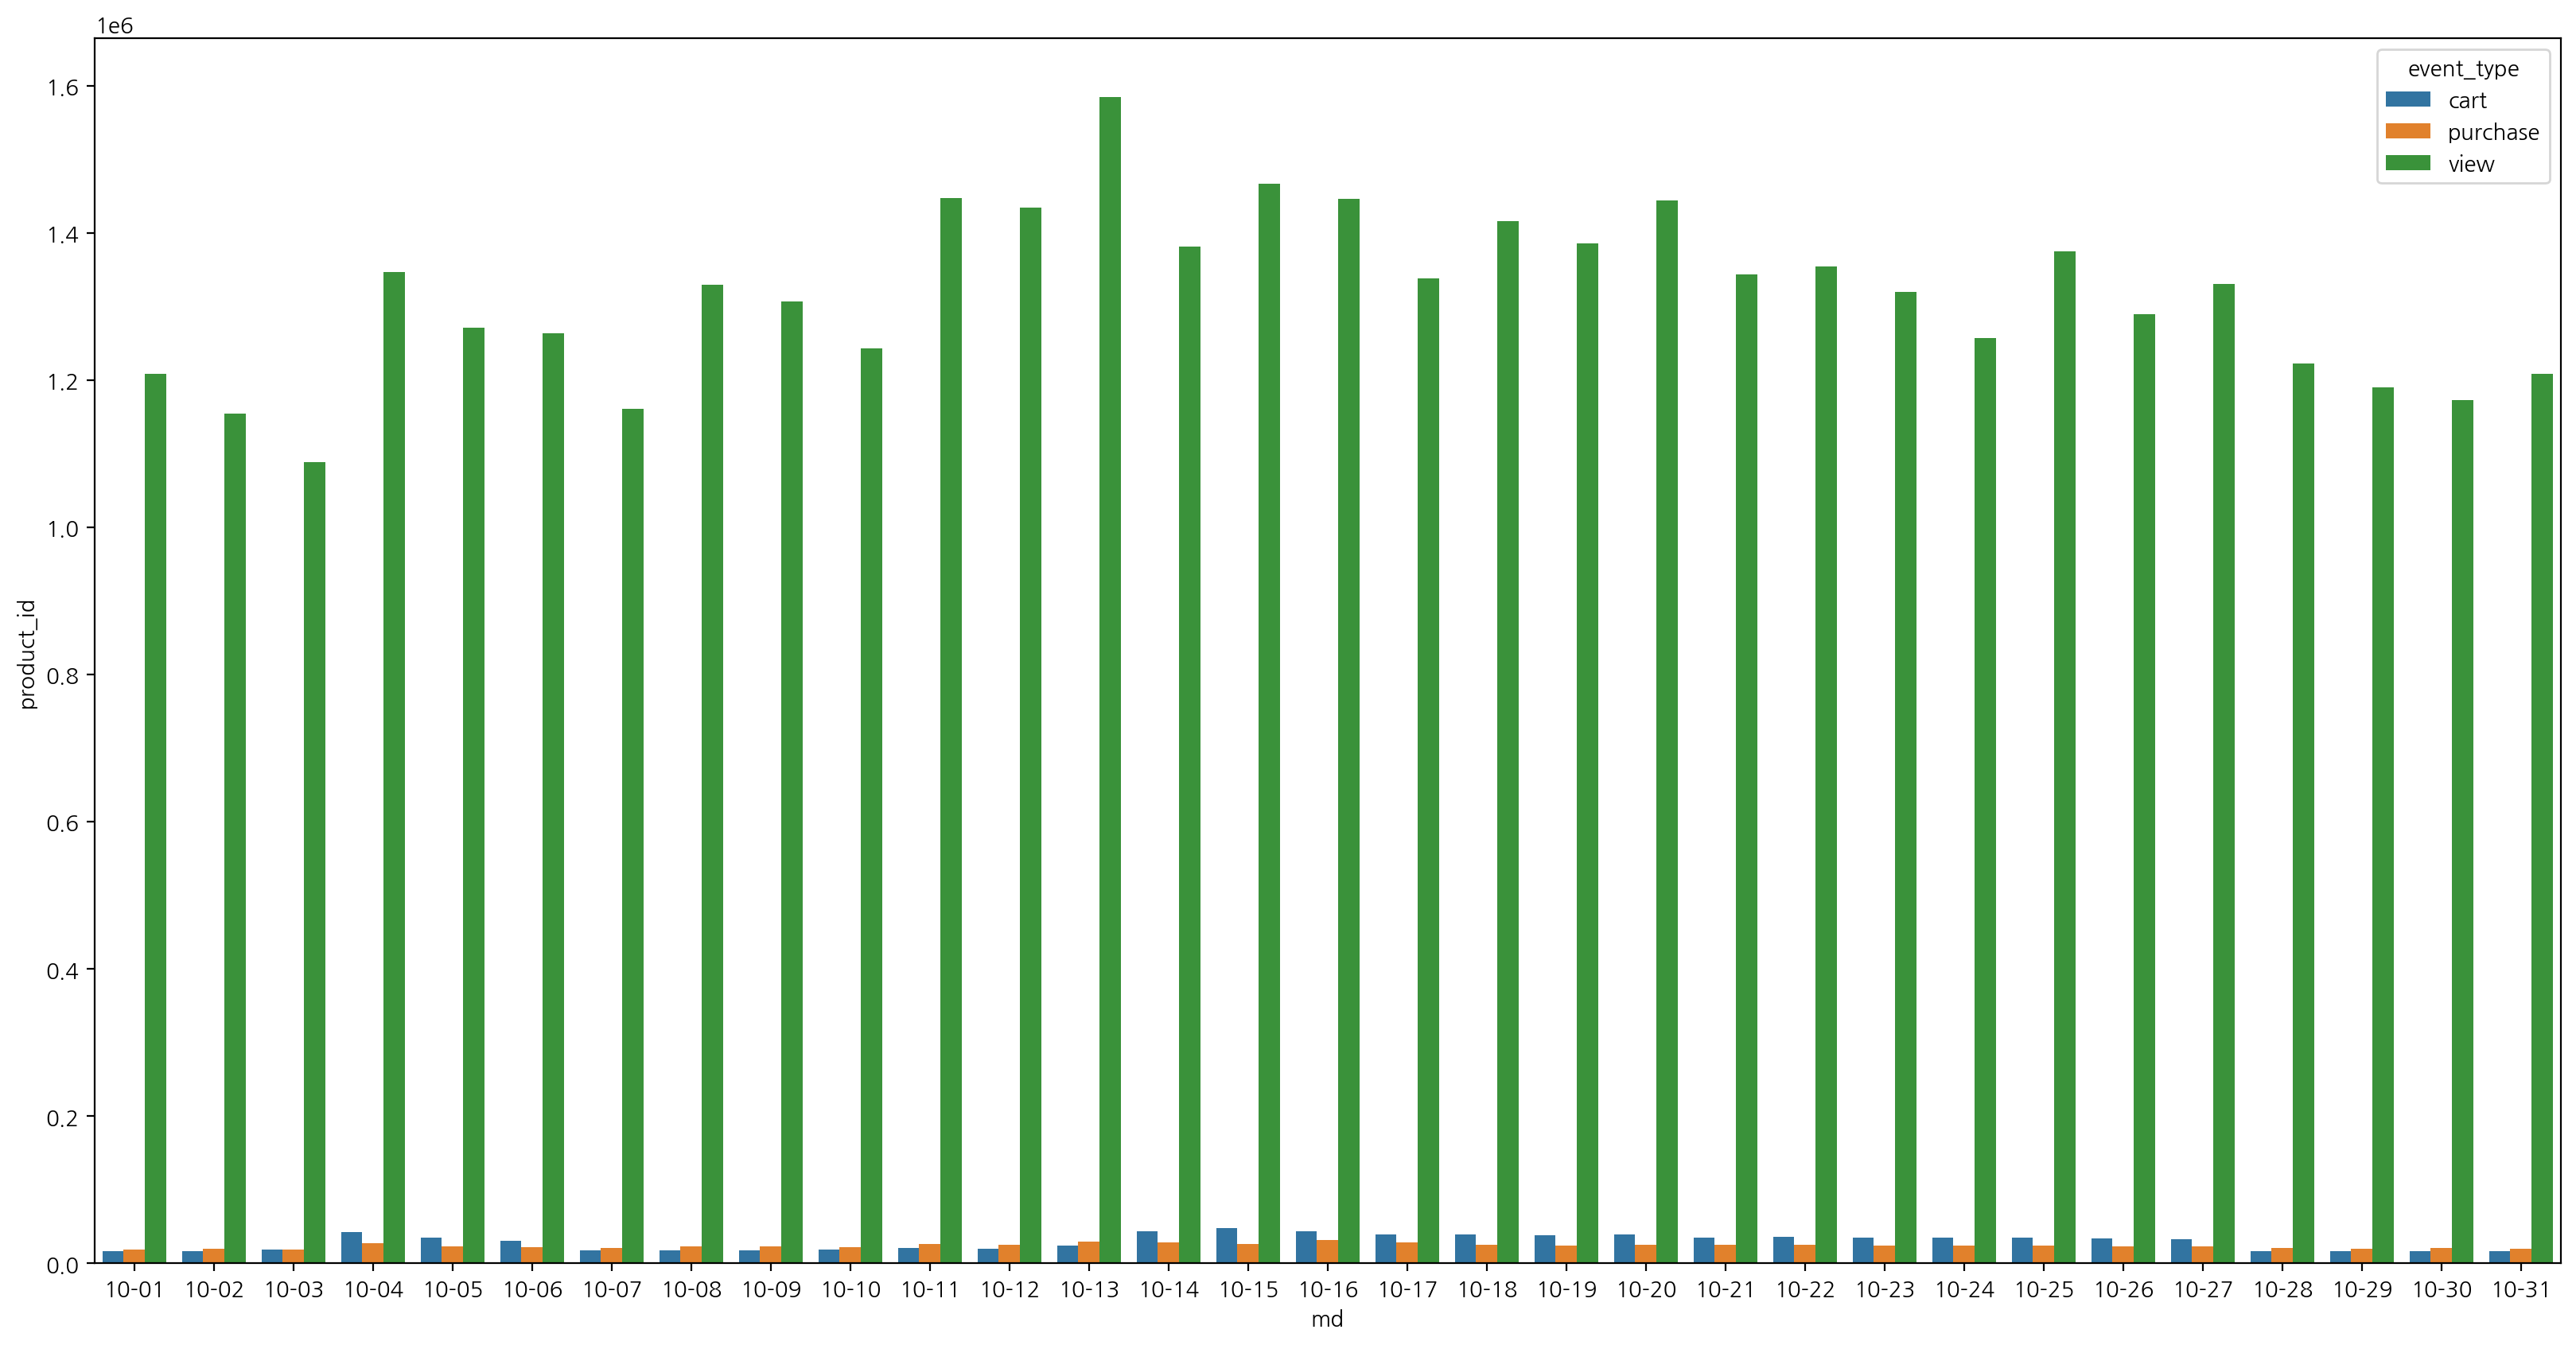

In [56]:
plt.figure(figsize=(20,10))
sns.barplot(data = Oct_item, x='md', y='product_id', hue='event_type');

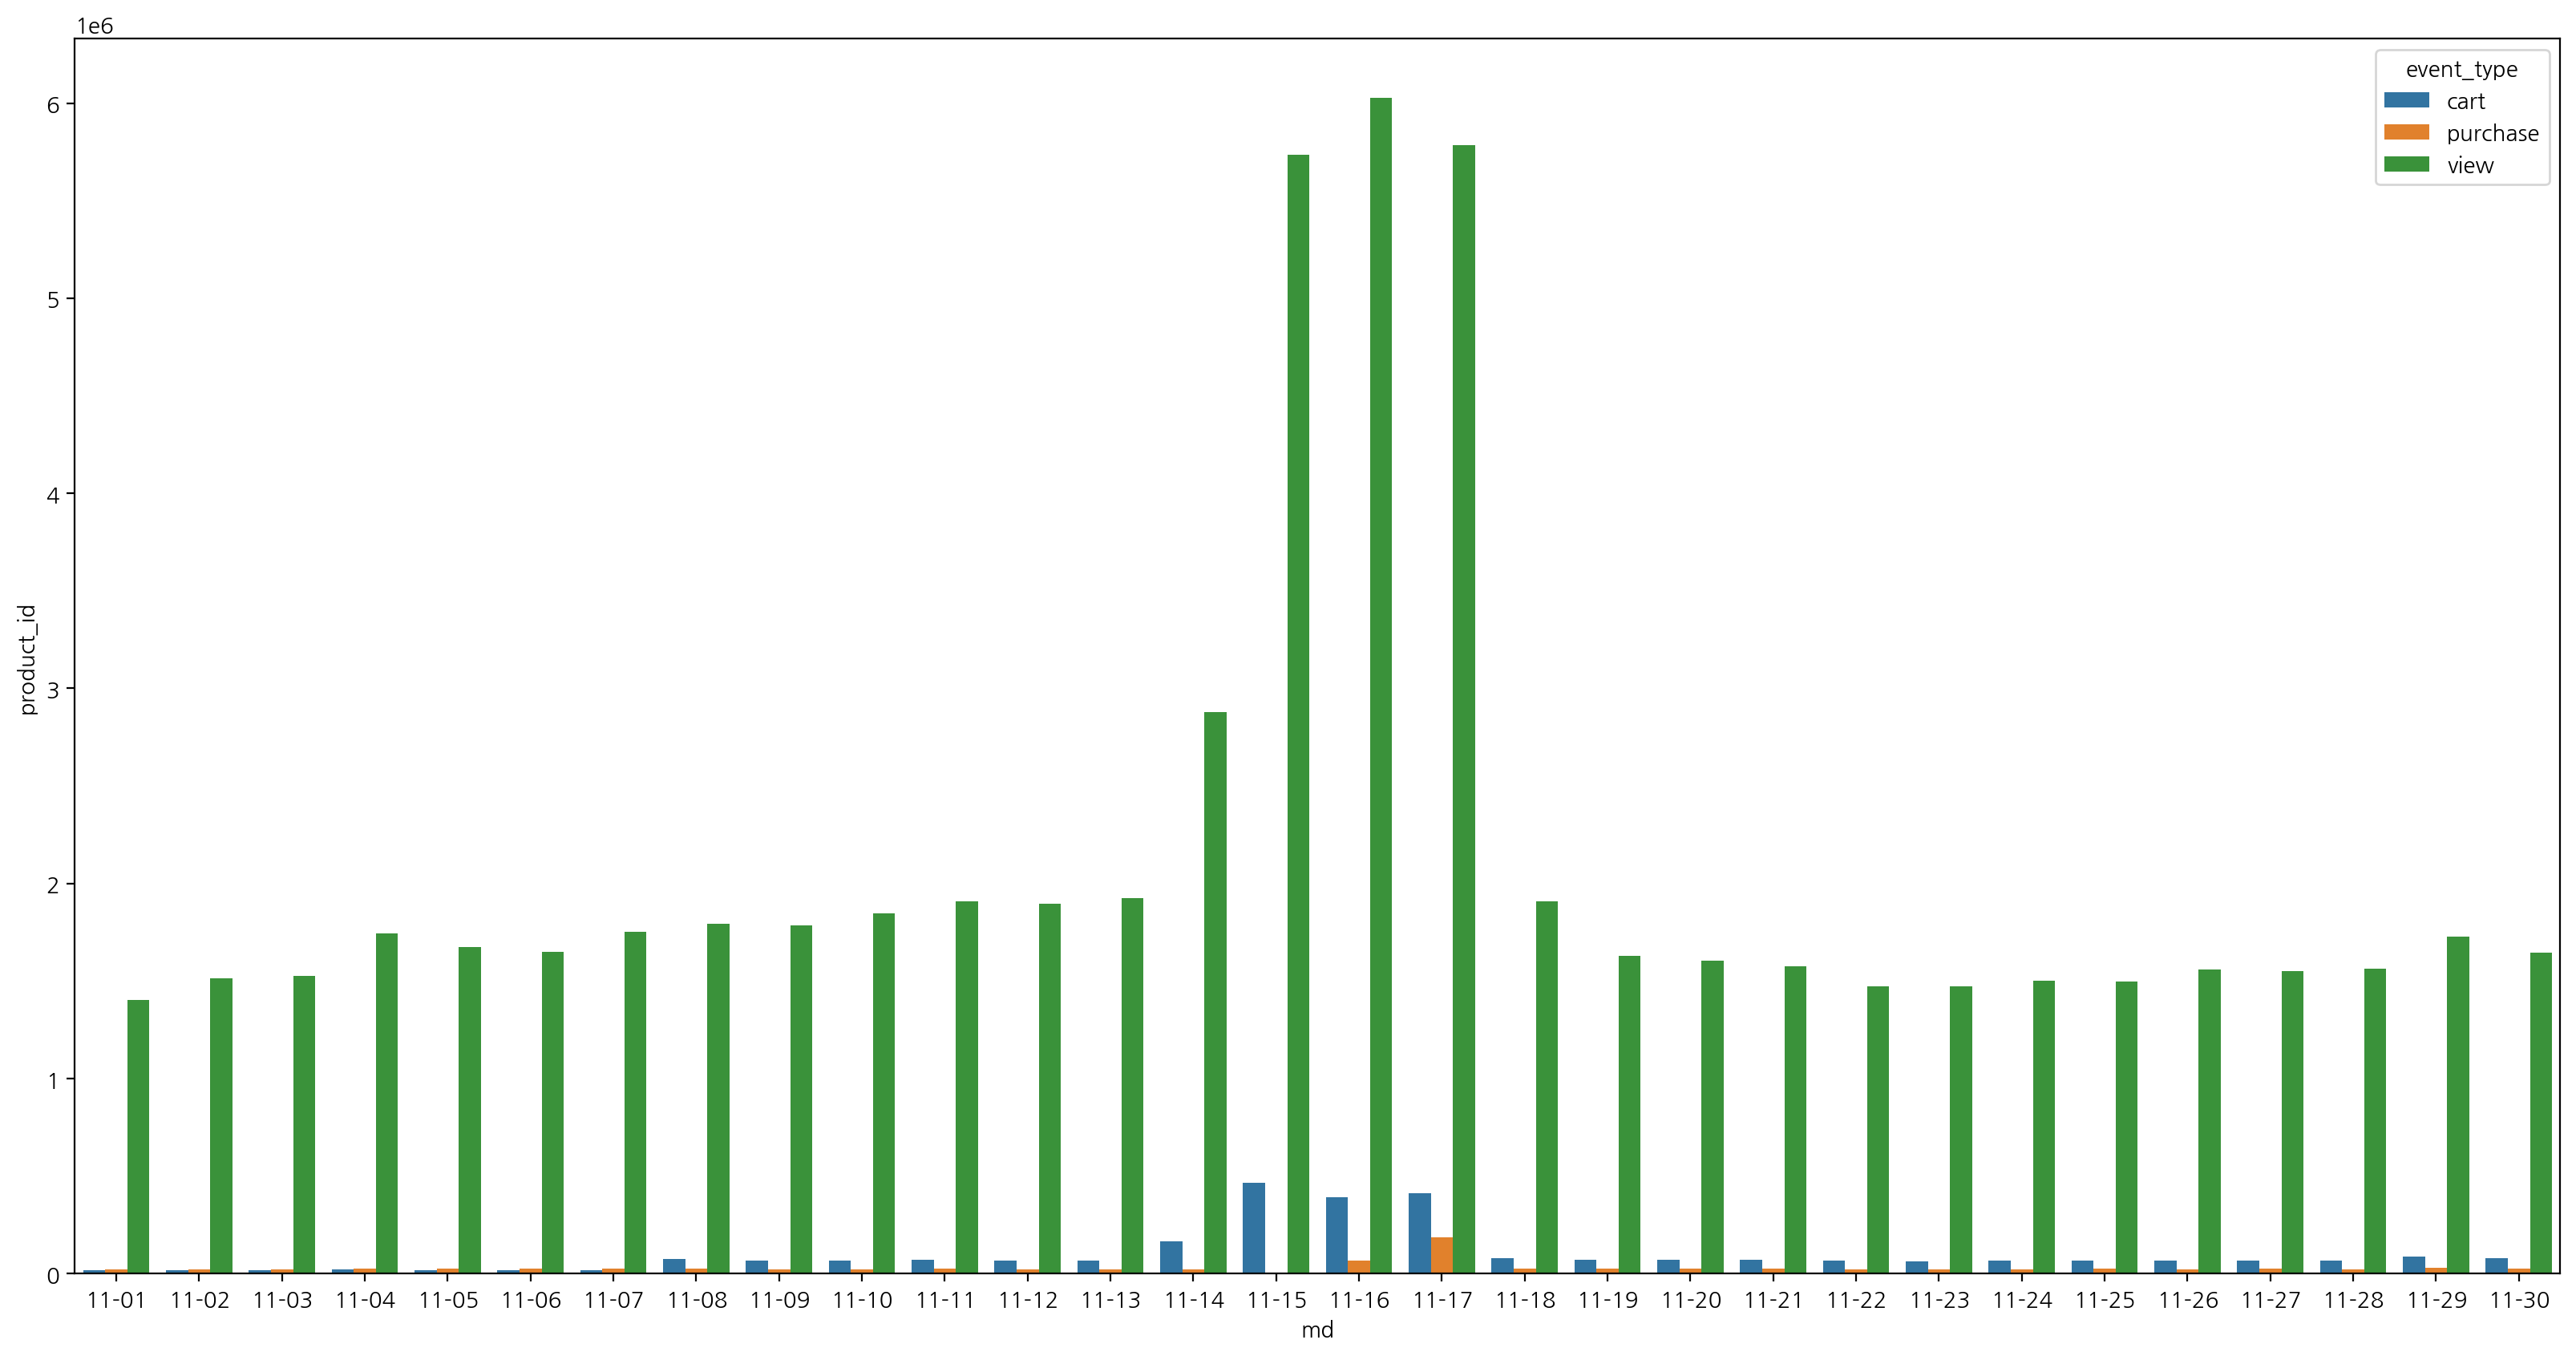

In [57]:
plt.figure(figsize=(20,10))
sns.barplot(data = Nov_item, x='md', y='product_id', hue='event_type');

## 일별 활성 사용자 수

In [60]:
df_day = df[['md', 'user_id']]
df_day.head()

,md,user_id
0,10-01,541312140
1,10-01,554748717
2,10-01,519107250
3,10-01,550050854
4,10-01,535871217


In [62]:
result = df_day.drop_duplicates()
df_arpu = result.groupby(['md']).agg({'user_id':'count'})
df_arpu = df_arpu.reset_index()
df_arpu.dtypes

md         object
user_id     int64
dtype: object

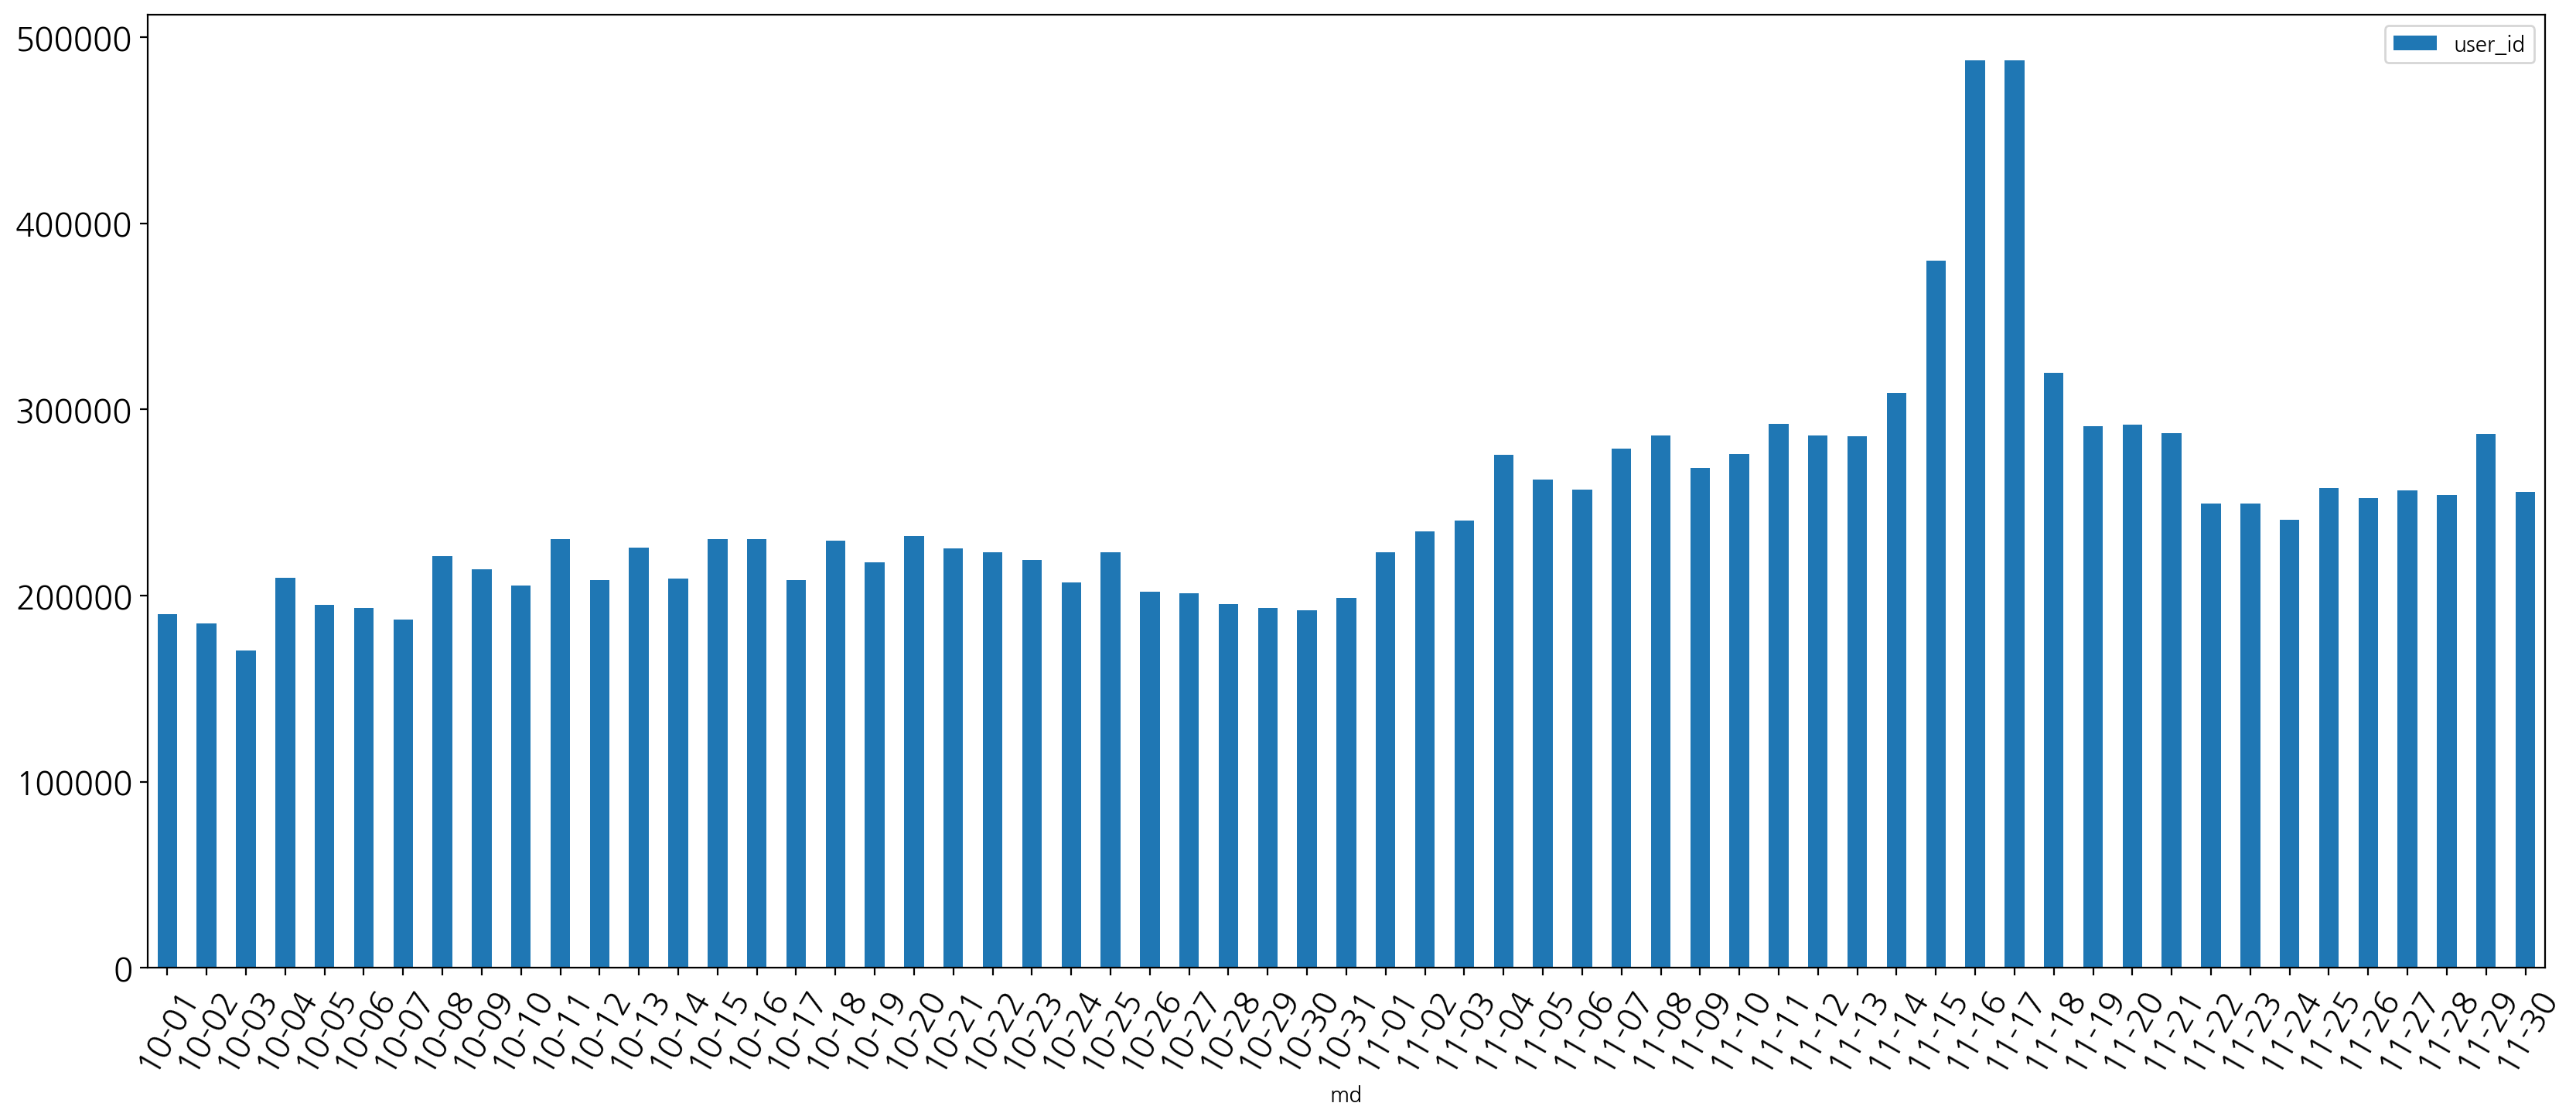

In [63]:
df_arpu.plot.bar(figsize=(20,8), x='md', y='user_id', rot=60, fontsize=15);

## 요일별 추이

In [64]:
df['days'] = df['event_time'].dt.strftime('%w')
df_dow = df.groupby(['days','event_type']).size().reset_index(name='total')
df_dow.head(10)

,days,event_type,total
0,0,cart,694033
1,0,purchase,353609
2,0,view,16278715
3,1,cart,357561
4,1,purchase,201242
5,1,view,12168258
6,2,cart,361123
7,2,purchase,211292
8,2,view,13306113
9,3,cart,357893


In [68]:
# 이벤트별로 묶어주기
event_view = df_dow[df_dow['event_type'] == 'view'].copy()
event_cart = df_dow[df_dow['event_type'] == 'cart'].copy()
event_purchase = df_dow[df_dow['event_type'] == 'purchase'].copy()

# index reset
event_view.reset_index(drop=True)
event_cart.reset_index(drop=True)
event_purchase.reset_index(drop=True)

# 요일명으로 변경
day = ['일','월','화', '수', '목', '금','토']
event_view['days'] = day
event_cart['days'] = day
event_purchase['days'] = day

event_view

,days,event_type,total
2,일,view,16278715
5,월,view,12168258
8,화,view,13306113
11,수,view,13126637
14,목,view,13903652
17,금,view,17721998
20,토,view,17826467


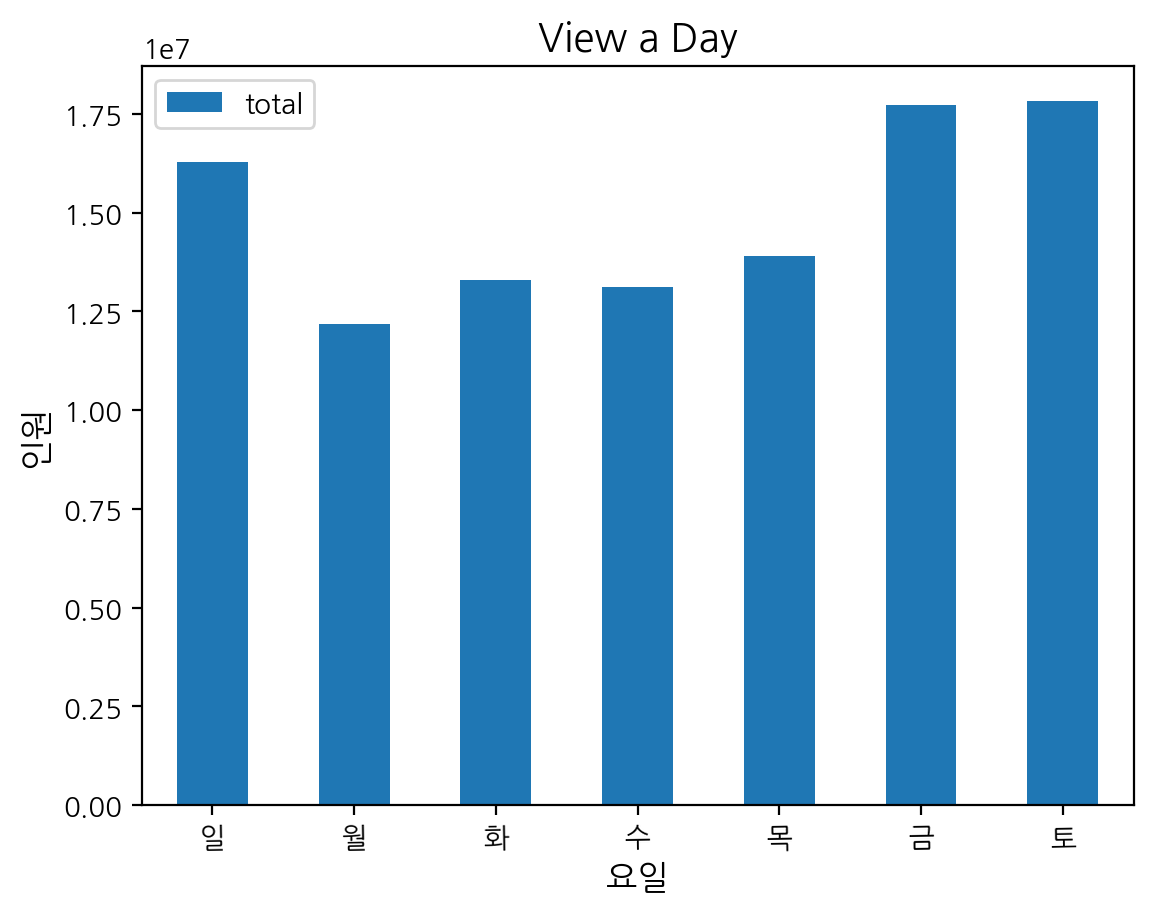

In [69]:
# view 추이
event_view.plot(kind='bar', x='days', y='total', rot=1)
plt.title('View a Day', fontsize=14)
plt.xlabel('요일', fontsize=12)
plt.ylabel('인원', fontsize=12)
plt.show()

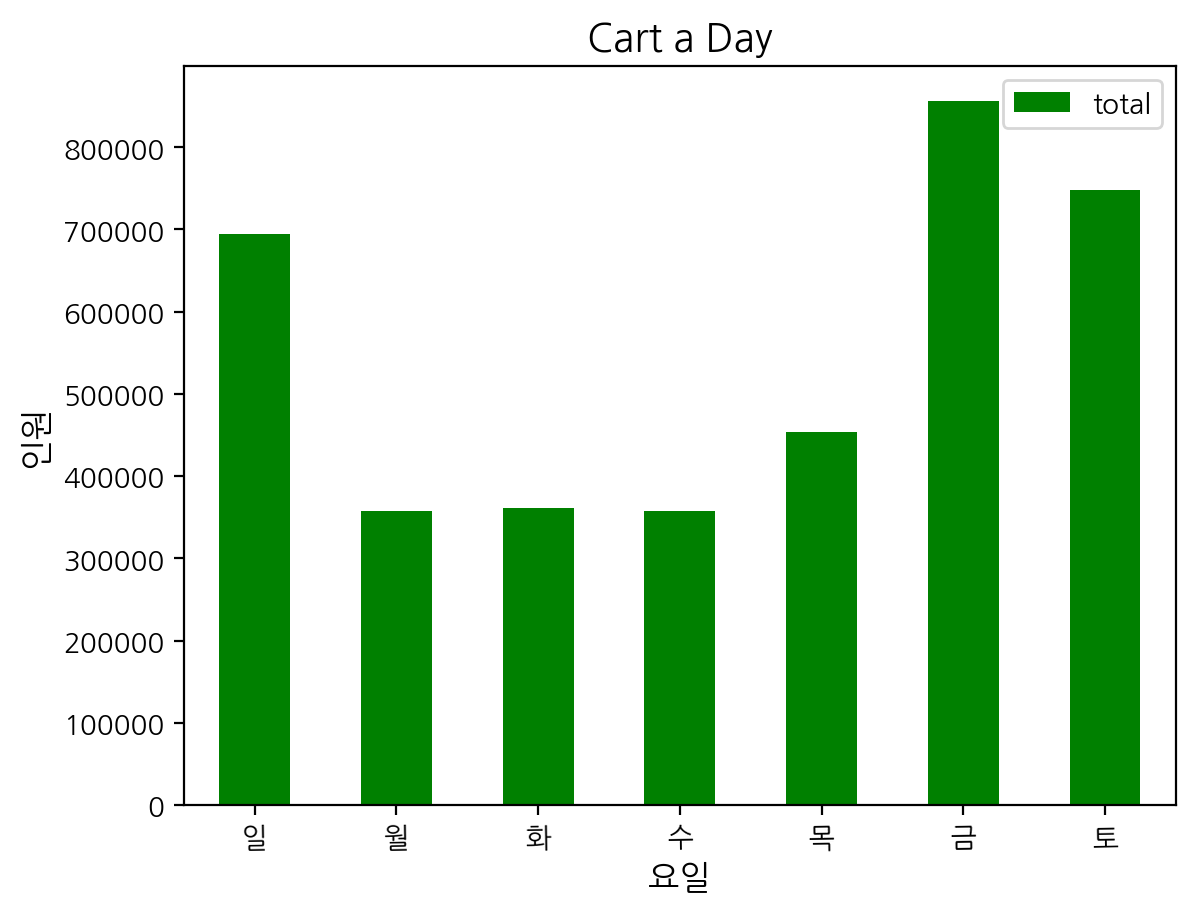

In [70]:
# cart 추이
event_cart.plot(kind='bar', x='days', y='total', rot=1, color='g')
plt.title('Cart a Day', fontsize=14)
plt.xlabel('요일', fontsize=12)
plt.ylabel('인원', fontsize=12)
plt.show()

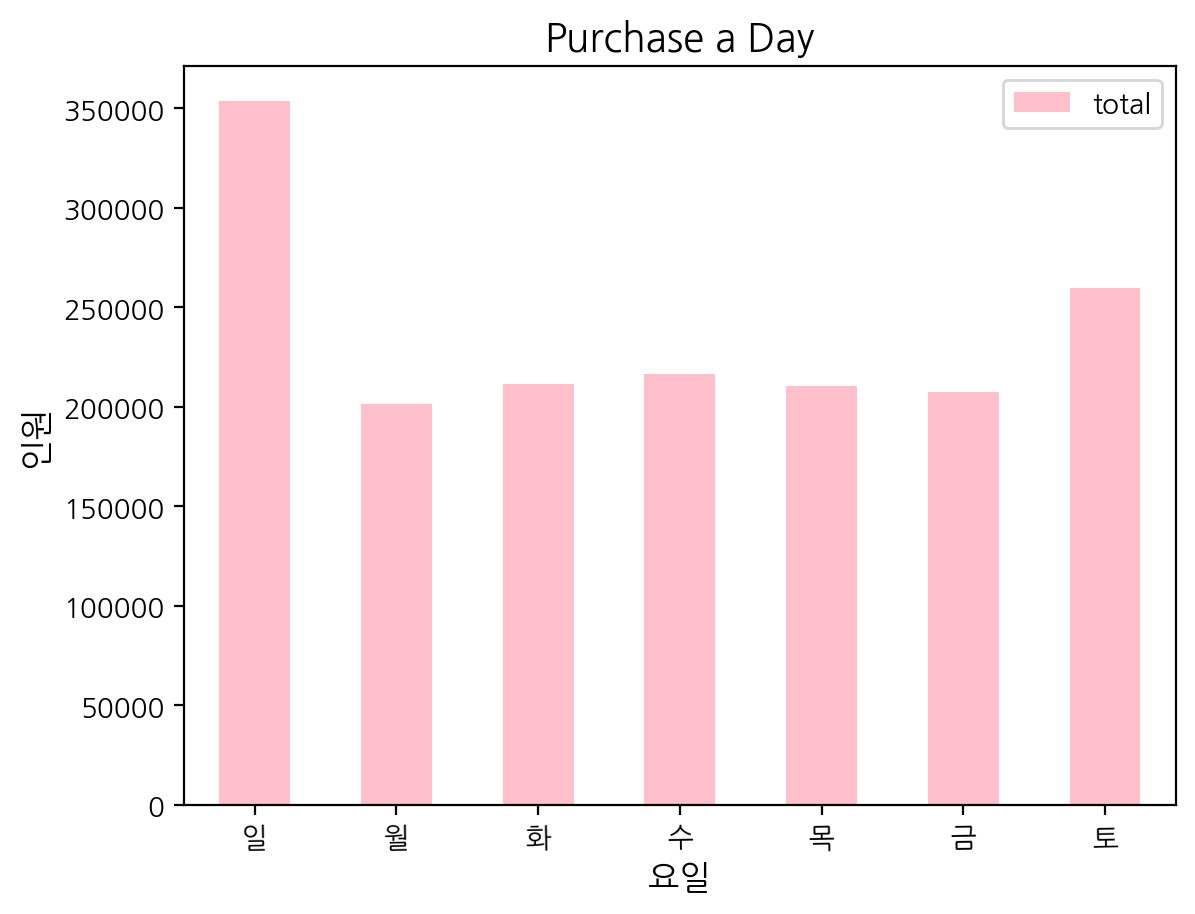

In [71]:
# purchase 추이
event_purchase.plot(kind='bar', x='days', y='total', rot=1, color='pink')
plt.title('Purchase a Day', fontsize=14)
plt.xlabel('요일', fontsize=12)
plt.ylabel('인원', fontsize=12)
plt.show()

In [73]:
pv_days = pd.pivot_table(df_dow,
                        index='days',
                        columns='event_type',
                        values='total',
                        aggfunc='sum')
pv_days.index = day
pv_days = pv_days[['view', 'cart', 'purchase']]
pv_days

event_type,view,cart,purchase
일,16278715,694033,353609
월,12168258,357561,201242
화,13306113,361123,211292
수,13126637,357893,216411
목,13903652,453441,210217
금,17721998,856111,207460
토,17826467,748299,259472


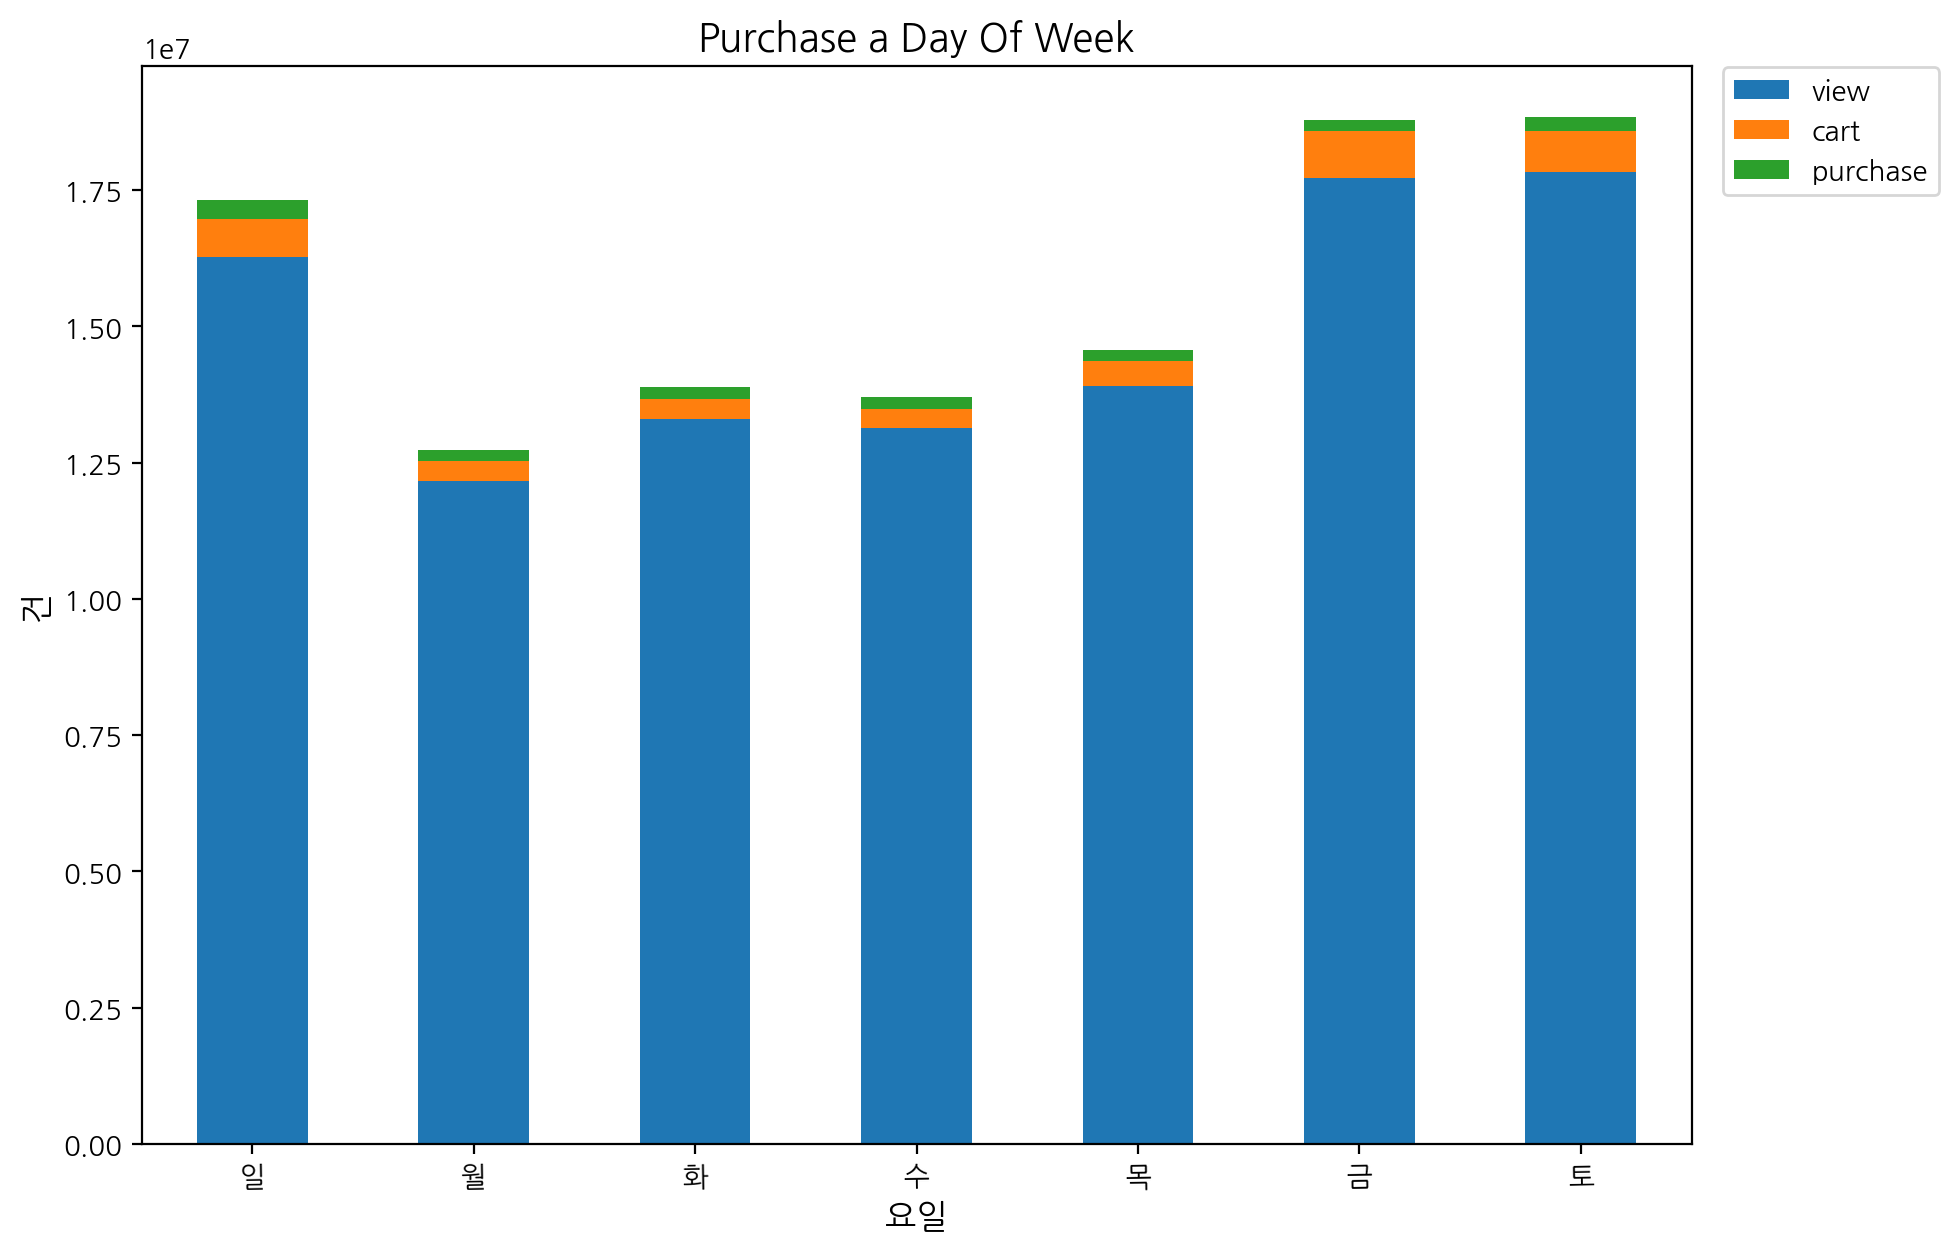

In [74]:
# purchase 추이
pv_days.plot.bar(stacked=True, figsize=(10, 7), rot=1);
plt.title('Purchase a Day Of Week', fontsize=14)
plt.xlabel('요일', fontsize=12)
plt.ylabel('건', fontsize=12)
plt.legend(loc=(1.02, 0.88))
plt.show()

## RFM 분석
- RFM 점수 = a * Recency 점수 + b * Frequency 점수 + c * Monetary 점수
- R, M에 더 큰 상수를 부여 (상대적 분석)

### 유효데이터 만들기

In [75]:
raw = df[['user_id','event_type','event_time','price','user_session']]
raw.shape

(109820004, 5)

In [76]:
# 구매 데이터만 가져오기
raw = raw[raw['event_type'] == 'purchase'].reset_index(drop=True)
raw.shape

(1659703, 5)

In [77]:
raw.head(2)

,user_id,event_type,event_time,price,user_session
0,543272936,purchase,2019-10-01 00:02:14,130.759995,8187d148-3c41-46d4-b0c0-9c08cd9dc564
1,551377651,purchase,2019-10-01 00:04:37,642.690002,3c80f0d6-e9ec-4181-8c5c-837a30be2d68


### user_session으로 만들기
- 판매 수는 user_id가 아닌, user_session과 비례 관계
- Date_order : 가장 최근 거래 시간
- user_id : 유저 id
- Quantity : user_session count (건당 구매 수량)
- spent : 건당 지출 금액

In [78]:
raw = raw.groupby(by='user_session').agg(Date_order=('event_time',lambda x: x.max()),
                                         user_id=('user_id','unique'),
                                         Quantity=('user_session','count'),
                                         spent=('price','sum')).reset_index(drop=True)
raw

,Date_order,user_id,Quantity,spent
0,2019-10-06 11:34:30,[546521725],1,289.519989
1,2019-10-25 08:39:11,[560486342],1,171.899994
2,2019-11-02 08:35:35,[563180871],1,123.550003
3,2019-11-11 03:35:34,[566954797],1,151.610001
4,2019-10-17 13:37:59,[560744406],2,379.779999
...,...,...,...,...
1402753,2019-11-18 11:20:56,[519523637],1,45.029999
1402754,2019-11-17 10:59:07,[523658055],1,32.150002
1402755,2019-11-25 10:56:59,[518862395],2,163.190002
1402756,2019-11-17 05:52:00,[571263795],2,66.639999


In [79]:
raw['user_id'] = raw['user_id'].astype('str').str[1:10]

In [80]:
raw['user_id']

0          546521725
1          560486342
2          563180871
3          566954797
4          560744406
             ...    
1402753    519523637
1402754    523658055
1402755    518862395
1402756    571263795
1402757    519073108
Name: user_id, Length: 1402758, dtype: object

### 결측치 확인

In [81]:
# 결측치 확인
raw.isnull().sum()

Date_order    0
user_id       0
Quantity      0
spent         0
dtype: int64

### 데이터 타입 확인

In [82]:
raw.dtypes

Date_order    datetime64[ns]
user_id               object
Quantity               int64
spent                float32
dtype: object

### 이상치 확인 및 제거
https://gannigoing.medium.com/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%9D%B4%EC%83%81%EC%B9%98-outlier-%EC%9D%98-%EA%B8%B0%EC%A4%80%EC%9D%80-%EB%AC%B4%EC%97%87%EC%9D%BC%EA%B9%8C-f11f60bf901a

In [83]:
raw['spent'].describe()

count    1.402758e+06
mean     3.600951e+02
std      4.995356e+02
min      7.700000e-01
25%      8.881000e+01
50%      1.904600e+02
75%      4.345000e+02
max      8.268232e+04
Name: spent, dtype: float64

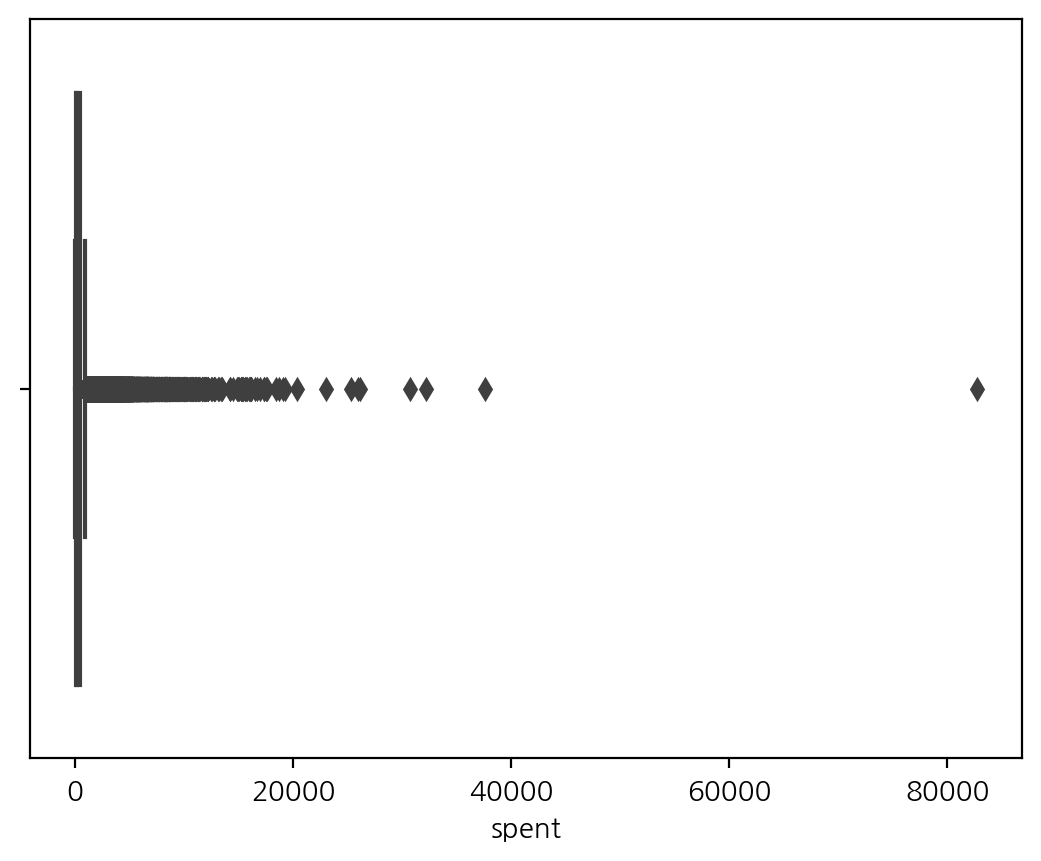

In [84]:
sns.boxplot(x=raw['spent']);

In [85]:
q1 = raw['spent'].quantile(0.25)
q2 = raw['spent'].quantile(0.5)
q3 = raw['spent'].quantile(0.75)
iqr = q3 - q1
iqr

345.69000244140625

In [86]:
outliers = raw[['spent']][(raw['spent'] < (q1 - 1.5 * iqr)) | (raw['spent'] > (q3 + 1.5 * iqr))]
outliers

,spent
18,1642.689941
41,1541.579956
46,999.609985
59,1747.699951
63,1003.239990
...,...
1402719,1010.140015
1402725,1415.479980
1402732,2715.199951
1402745,959.729980


In [87]:
raw_valid = raw[~raw.index.isin(outliers.index)].reset_index(drop=True)
raw_valid 

,Date_order,user_id,Quantity,spent
0,2019-10-06 11:34:30,546521725,1,289.519989
1,2019-10-25 08:39:11,560486342,1,171.899994
2,2019-11-02 08:35:35,563180871,1,123.550003
3,2019-11-11 03:35:34,566954797,1,151.610001
4,2019-10-17 13:37:59,560744406,2,379.779999
...,...,...,...,...
1270585,2019-11-18 11:20:56,519523637,1,45.029999
1270586,2019-11-17 10:59:07,523658055,1,32.150002
1270587,2019-11-25 10:56:59,518862395,2,163.190002
1270588,2019-11-17 05:52:00,571263795,2,66.639999


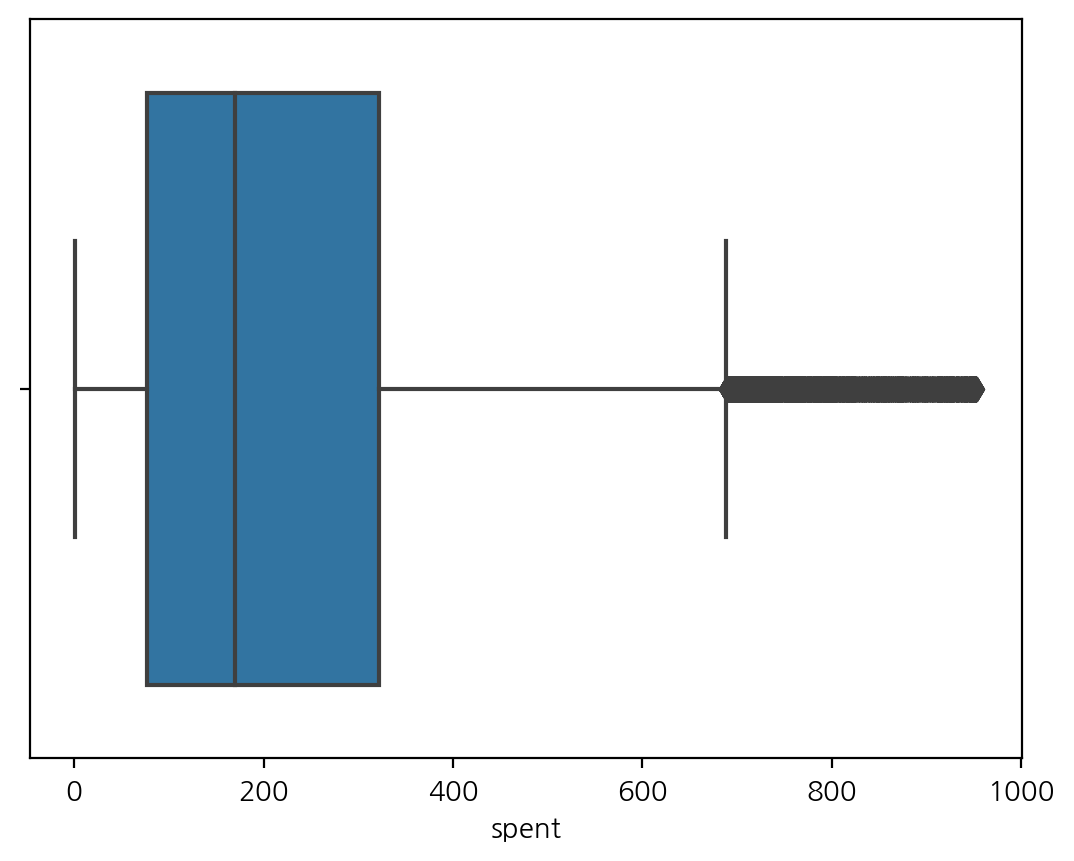

In [88]:
sns.boxplot(x=raw_valid['spent']);

https://oak.jejunu.ac.kr/bitstream/2020.oak/23663/2/RFM%20%EB%AA%A8%ED%98%95%EC%9D%98%20%EA%B0%80%EC%A4%91%EC%B9%98%20%EC%84%A0%ED%83%9D%EC%97%90%20%EA%B4%80%ED%95%9C%20%EC%97%B0%EA%B5%AC.pdf
에 근거하여 이상치 제거 안하기로 결정

In [89]:
raw

,Date_order,user_id,Quantity,spent
0,2019-10-06 11:34:30,546521725,1,289.519989
1,2019-10-25 08:39:11,560486342,1,171.899994
2,2019-11-02 08:35:35,563180871,1,123.550003
3,2019-11-11 03:35:34,566954797,1,151.610001
4,2019-10-17 13:37:59,560744406,2,379.779999
...,...,...,...,...
1402753,2019-11-18 11:20:56,519523637,1,45.029999
1402754,2019-11-17 10:59:07,523658055,1,32.150002
1402755,2019-11-25 10:56:59,518862395,2,163.190002
1402756,2019-11-17 05:52:00,571263795,2,66.639999


In [90]:
raw.iloc[raw['spent'].nlargest(1).index]

,Date_order,user_id,Quantity,spent
159564,2019-11-17 17:58:35,518514099,76,82682.320312


### 구매 건당 지출 금액

In [91]:
raw['spent'].describe()

count    1.402758e+06
mean     3.600951e+02
std      4.995356e+02
min      7.700000e-01
25%      8.881000e+01
50%      1.904600e+02
75%      4.345000e+02
max      8.268232e+04
Name: spent, dtype: float64

## R, F, M 계산하기
- Recency는 가장 최근 구매일로부터 경과한 일수
- Frequency는 고객의 총 구매 횟수
- Monetary는 총 구매

### 전체 주문에서 최근 구매일 구하기

In [93]:
# 최근 구매일 계산
last_timestamp = df['event_time'].max() + dt.timedelta(days=1)
last_timestamp

Timestamp('2019-12-01 23:59:59')

### 고객별 Recency, Frequency, Monetary 값 구하기

In [94]:
rfm = raw.groupby(by='user_id').agg({'Date_order' : lambda x: (last_timestamp - x.max()).days,
                                     'user_id' : 'count', 
                                     'spent' : 'sum'})
rfm.head(3)

,Date_order,user_id,spent
user_id,,,
138340325,20,1,93.500000
225644257,19,1,40.910000
253299396,25,1,246.850006


In [95]:
# 컬럼명 변경
rfm = rfm.rename(columns= {'Date_order' : 'Recency',
                           'user_id' : 'Frequency',
                           'spent' : 'MonetaryValue'})
rfm.head()

,Recency,Frequency,MonetaryValue
user_id,,,
138340325,20,1,93.500000
225644257,19,1,40.910000
253299396,25,1,246.850006
256164170,11,1,113.230003
264649825,56,2,1240.040039


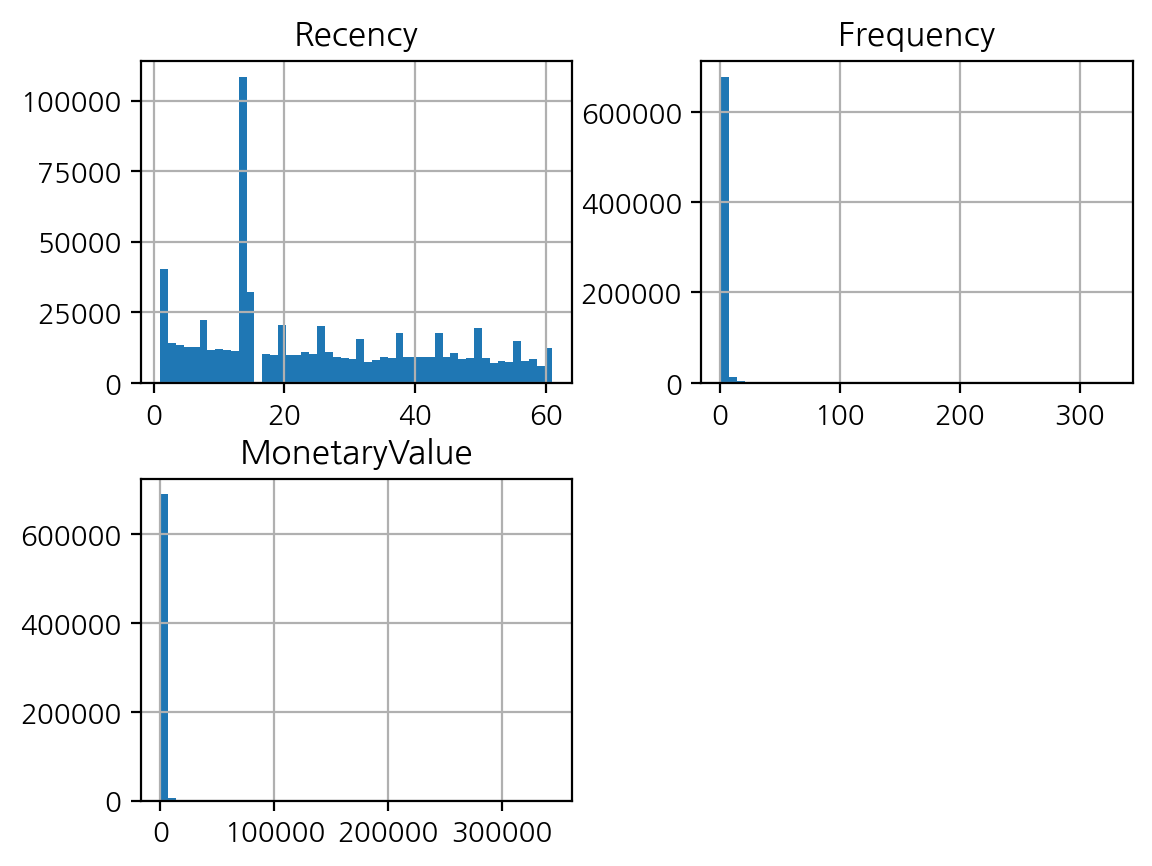

In [96]:
rfm.hist(bins=50);

In [97]:
rfm['Frequency'].describe()

count    697470.000000
mean          2.011209
std           2.979720
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         328.000000
Name: Frequency, dtype: float64

In [98]:
rfm[rfm['Frequency'] == 1].shape

(440511, 3)

### 고객당 매출

In [99]:
# user_id당 구매횟수 데이터프레임 만들기
buy_count = pd.DataFrame(raw['user_id'].value_counts())
buy_count.reset_index(inplace=True)
buy_count.columns = ['user_id', 'count']
buy_count.shape

(697470, 2)

In [100]:
buy_mon = pd.DataFrame(rfm['MonetaryValue'].sort_values())
buy_mon.reset_index(inplace=True)
buy_mon.columns = ['user_id', 'sum']
buy_mon.shape

(697470, 2)

In [101]:
customer_price = pd.merge(buy_mon, buy_count, how='left')
customer_price.shape

(697470, 3)

In [102]:
customer_price.tail(10)

,user_id,sum,count
697460,515715331,175747.265625,93
697461,532499743,180755.406250,58
697462,534545940,183309.031250,91
697463,549109608,184394.515625,173
697464,530834332,188820.875000,71
697465,518514099,203986.062500,30
697466,519267944,265569.531250,138
697467,513117637,266331.250000,117
697468,515384420,303144.250000,106
697469,512386086,343899.093750,328


In [103]:
customer_price.head(10)

,user_id,sum,count
0,520573734,0.77,1
1,513378422,0.79,1
2,517557126,0.87,1
3,524830675,0.87,1
4,549663623,0.88,1
5,512741995,0.88,1
6,514423158,0.88,1
7,561293364,0.88,1
8,512503089,0.88,1
9,513377188,0.88,1


### 고객당 주문 한건당 매출

In [104]:
customer_price['unitprice'] = customer_price['sum'] / customer_price['count']
customer_price.head()

,user_id,sum,count,unitprice
0,520573734,0.77,1,0.77
1,513378422,0.79,1,0.79
2,517557126,0.87,1,0.87
3,524830675,0.87,1,0.87
4,549663623,0.88,1,0.88


In [105]:
customer_price.tail()

,user_id,sum,count,unitprice
697465,518514099,203986.06250,30,6799.535417
697466,519267944,265569.53125,138,1924.416893
697467,513117637,266331.25000,117,2276.335470
697468,515384420,303144.25000,106,2859.851415
697469,512386086,343899.09375,328,1048.472847


In [106]:
# 구매 수가 1번 인 고객 : 440511명
len(customer_price[customer_price['count']==1])

440511

## RFM 모형

In [107]:
rfm.quantile(q = [0.25,0.5,0.75])

,Recency,Frequency,MonetaryValue
0.25,13.0,1.0,118.379997
0.50,21.0,1.0,257.149994
0.75,40.0,2.0,669.229980


In [108]:
quartiles = rfm.quantile(q = [0.25,0.5,0.75]).to_dict()
quartiles

{'Recency': {0.25: 13.0, 0.5: 21.0, 0.75: 40.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 2.0},
 'MonetaryValue': {0.25: 118.37999725341797,
  0.5: 257.1499938964844,
  0.75: 669.22998046875}}

In [109]:
## for Recency 

def R(x, q, r):
    if x <= q[r][0.25]:
        return 4
    elif x <= q[r][0.50]:
        return 3
    elif x <= q[r][0.75]: 
        return 2
    else:
        return 1
    
## for Frequency and Monetary 

def FM(x,q,fm):
    if x <= q[fm][0.25]:
        return 1
    elif x <= q[fm][0.50]:
        return 2
    elif x <= q[fm][0.75]: 
        return 3
    else:
        return 4    

In [110]:
rfm['Recency'].apply(R, args=(quartiles, 'Recency'))
rfm['Frequency'].apply(FM, args=(quartiles, 'Frequency'))

user_id
138340325    1
225644257    1
253299396    1
256164170    1
264649825    3
            ..
579962677    1
579963523    1
579964521    1
579966375    1
579967058    1
Name: Frequency, Length: 697470, dtype: int64

In [111]:
#create RFM segmentation column
rfm['R_Quartile'] = rfm['Recency'].apply(R, args=(quartiles, 'Recency'))
rfm['F_Quartile'] = rfm['Frequency'].apply(FM, args=(quartiles, 'Frequency'))
rfm['M_Quartile'] = rfm['MonetaryValue'].apply(FM, args=(quartiles, 'MonetaryValue'))
rfm['RFM_segmentation'] = rfm.R_Quartile.map(str) \
                    + rfm.F_Quartile.map(str) \
                    + rfm.M_Quartile.map(str)
rfm['RFM_score'] = rfm.R_Quartile.map(int) + rfm.F_Quartile.map(int) + rfm.M_Quartile.map(int)
rfm.head()

,Recency,Frequency,MonetaryValue,R_Quartile,F_Quartile,M_Quartile,RFM_segmentation,RFM_score
user_id,,,,,,,,
138340325,20,1,93.500000,3,1,1,311,5
225644257,19,1,40.910000,3,1,1,311,5
253299396,25,1,246.850006,2,1,2,212,5
256164170,11,1,113.230003,4,1,1,411,6
264649825,56,2,1240.040039,1,3,4,134,8


### 가중치 탐색
- 김동석 (2021). RFM 모형의 가중치 선택에 관한 연구. 제주대학교. 석사학위논문 참고함
- RFM 점수에서 상위 20% 고객들의 평균값 vs. 전체 자료의 R, F, M의 상위 20%의 고객들의 평균값을 비교
- 가장 유사한 값 구하기

In [112]:
# R 상위 20% 고객 비교
total_RFM = rfm.sort_values(by='Recency', ascending=False) 
L = int(len(total_RFM) * 0.2)
R_mean = total_RFM['Recency'][:L].mean()
R_mean

52.146830688058266

In [113]:
# F 상위 20% 고객 비교
total_RFM = rfm.sort_values(by='Frequency', ascending=False) 
L = int(len(total_RFM) * 0.2)
F_mean = total_RFM['Frequency'][:L].mean()
F_mean

5.213966192094284

In [114]:
# M 상위 20% 고객 비교
total_RFM = rfm.sort_values(by='MonetaryValue', ascending=False) 
L = int(len(total_RFM) * 0.2)
M_mean = total_RFM['MonetaryValue'][:L].mean()
M_mean

2610.879

In [115]:
rfm_diff = rfm.copy()

In [116]:
a_r = 0.7
b_f = 0.1
c_m = 0.2
rfm_diff['RFM_score'] = a_r* rfm_diff.R_Quartile.map(int) + b_f *rfm_diff.F_Quartile.map(int) + c_m*rfm_diff.M_Quartile.map(int)

In [117]:
# RFM_score 상위 20% 고객 비교
top_score = rfm_diff.sort_values(by='RFM_score', ascending=False) 
L = int(len(top_score) * 0.2)
diff = top_score[['Recency','Frequency','MonetaryValue']][:L].mean()
diff

Recency             6.915330
Frequency           3.747960
MonetaryValue    1579.763672
dtype: float64

In [118]:
# 차이가 가장 적은 값을 구하기
(diff['Recency'] / R_mean) + (diff['Frequency'] / F_mean) + (diff['MonetaryValue'] / M_mean)

1.45651332952023

In [119]:
rfm = rfm_diff

In [120]:
rfm.groupby('RFM_score').agg({'Recency' : 'mean',
                              'Frequency' : 'mean',
                              'MonetaryValue' : ['mean','sum']
                             }).style.background_gradient().format('{:,.0f}')

### qcut으로 고객군 나누기

In [121]:
# qcut 을 통해 5단계로 고객군을 나눕니다. 
rfm['RFM_class'] = pd.qcut(rfm['RFM_score'],
                           q=5,
                           labels=['Lost', 'About To Sleep', 'Silver','GOLD','VVIP'])

In [122]:
rfm

,Recency,Frequency,MonetaryValue,R_Quartile,F_Quartile,M_Quartile,RFM_segmentation,RFM_score,RFM_class
user_id,,,,,,,,,
138340325,20,1,93.500000,3,1,1,311,2.4,Silver
225644257,19,1,40.910000,3,1,1,311,2.4,Silver
253299396,25,1,246.850006,2,1,2,212,1.9,About To Sleep
256164170,11,1,113.230003,4,1,1,411,3.1,GOLD
264649825,56,2,1240.040039,1,3,4,134,1.8,About To Sleep
...,...,...,...,...,...,...,...,...,...
579962677,1,1,1634.380005,4,1,4,414,3.7,VVIP
579963523,1,1,457.910004,4,1,3,413,3.5,VVIP
579964521,1,1,334.600006,4,1,3,413,3.5,VVIP


### RFM 시각화

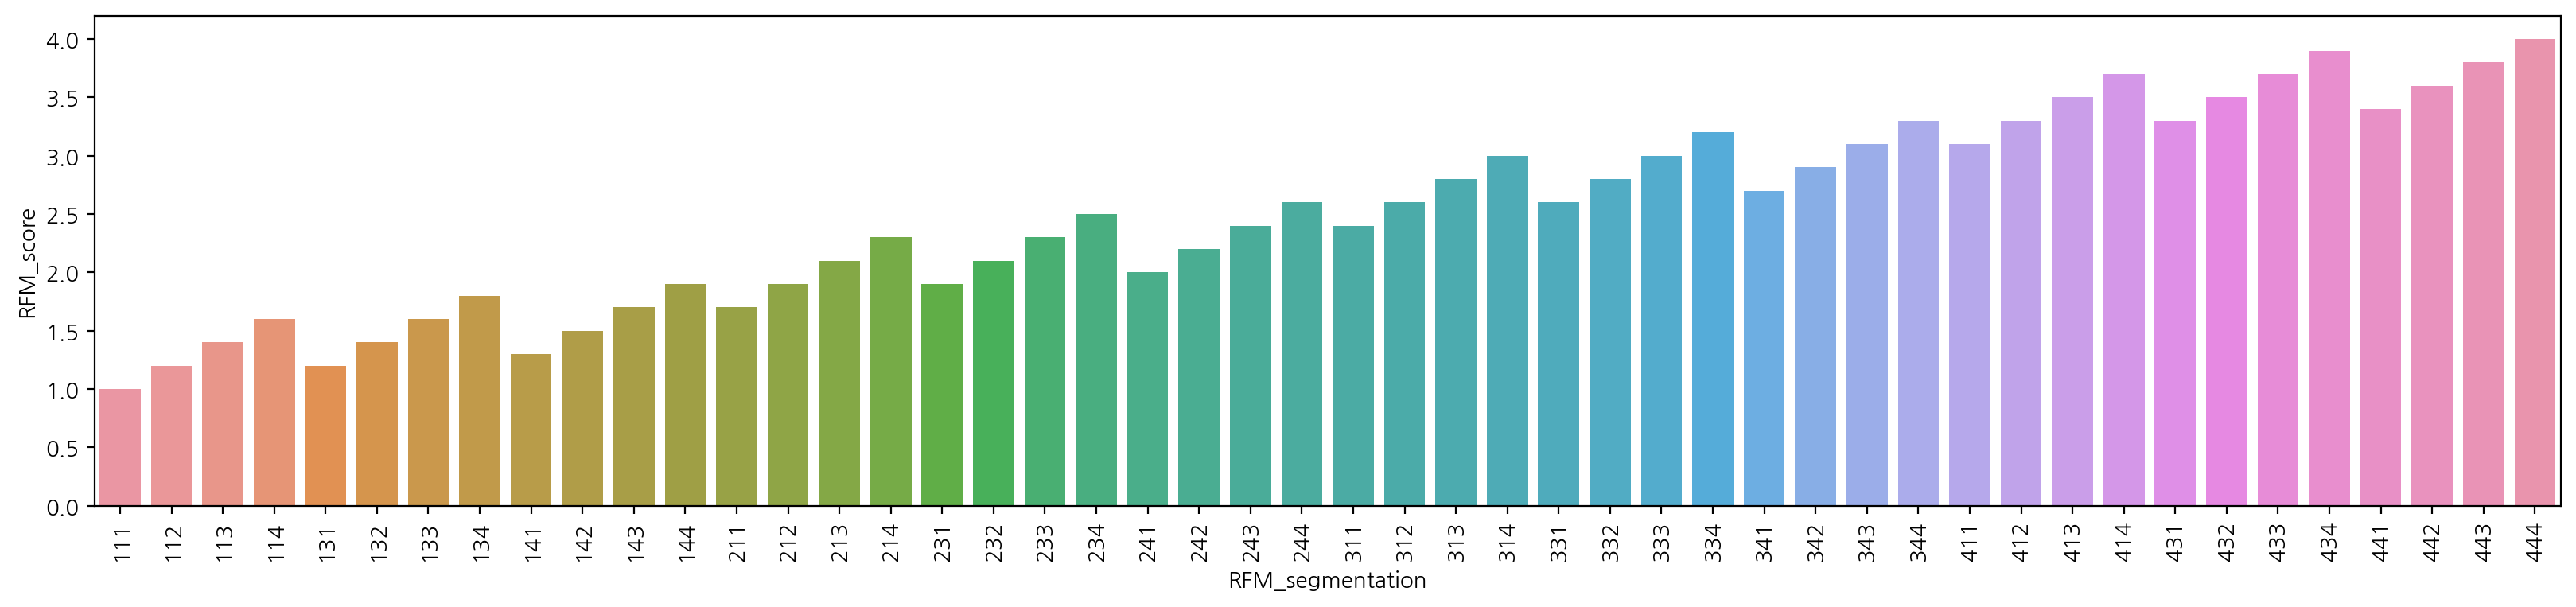

In [123]:
# RFM segment 값에 따라 정렬합니다.
plt.figure(figsize=(20, 4))
plt.xticks(rotation=90)
sns.barplot(data=rfm.sort_values('RFM_segmentation'), x='RFM_segmentation', y='RFM_score');

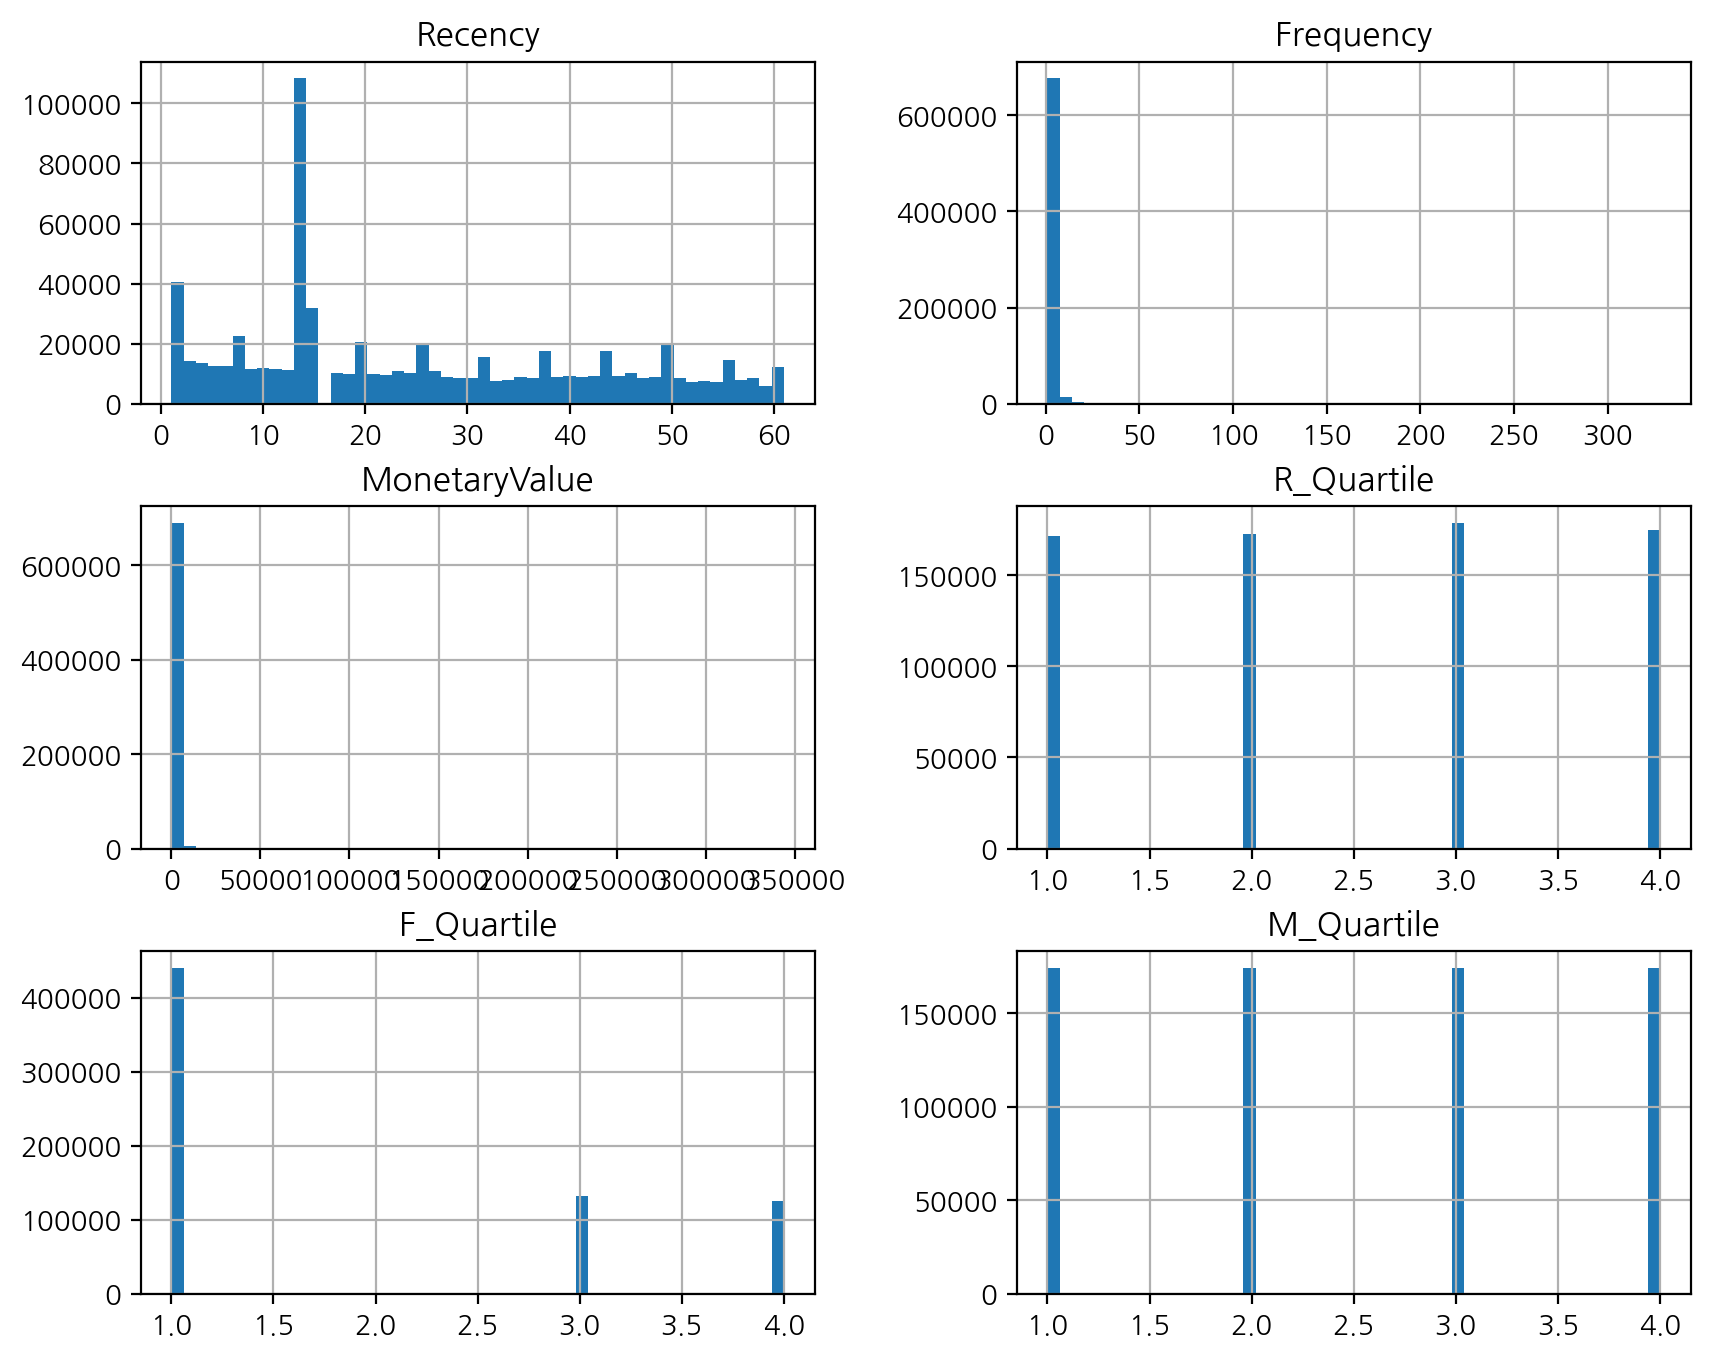

In [124]:
rfm.iloc[:, :-3].astype(float).hist(figsize=(10,8), bins=50);

### 고객 등급 나누기

In [125]:
# 각 등급별 크기를 구해보자.
RFM_desc = rfm.groupby('RFM_class').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count', 'sum']
}).round(1)

RFM_desc.style.background_gradient(cmap='Blues').format('{:,.0f}')

In [126]:
RFM = rfm[['Recency','Frequency','MonetaryValue','RFM_score','RFM_class']].copy()
RFM

,Recency,Frequency,MonetaryValue,RFM_score,RFM_class
user_id,,,,,
138340325,20,1,93.500000,2.4,Silver
225644257,19,1,40.910000,2.4,Silver
253299396,25,1,246.850006,1.9,About To Sleep
256164170,11,1,113.230003,3.1,GOLD
264649825,56,2,1240.040039,1.8,About To Sleep
...,...,...,...,...,...
579962677,1,1,1634.380005,3.7,VVIP
579963523,1,1,457.910004,3.5,VVIP
579964521,1,1,334.600006,3.5,VVIP


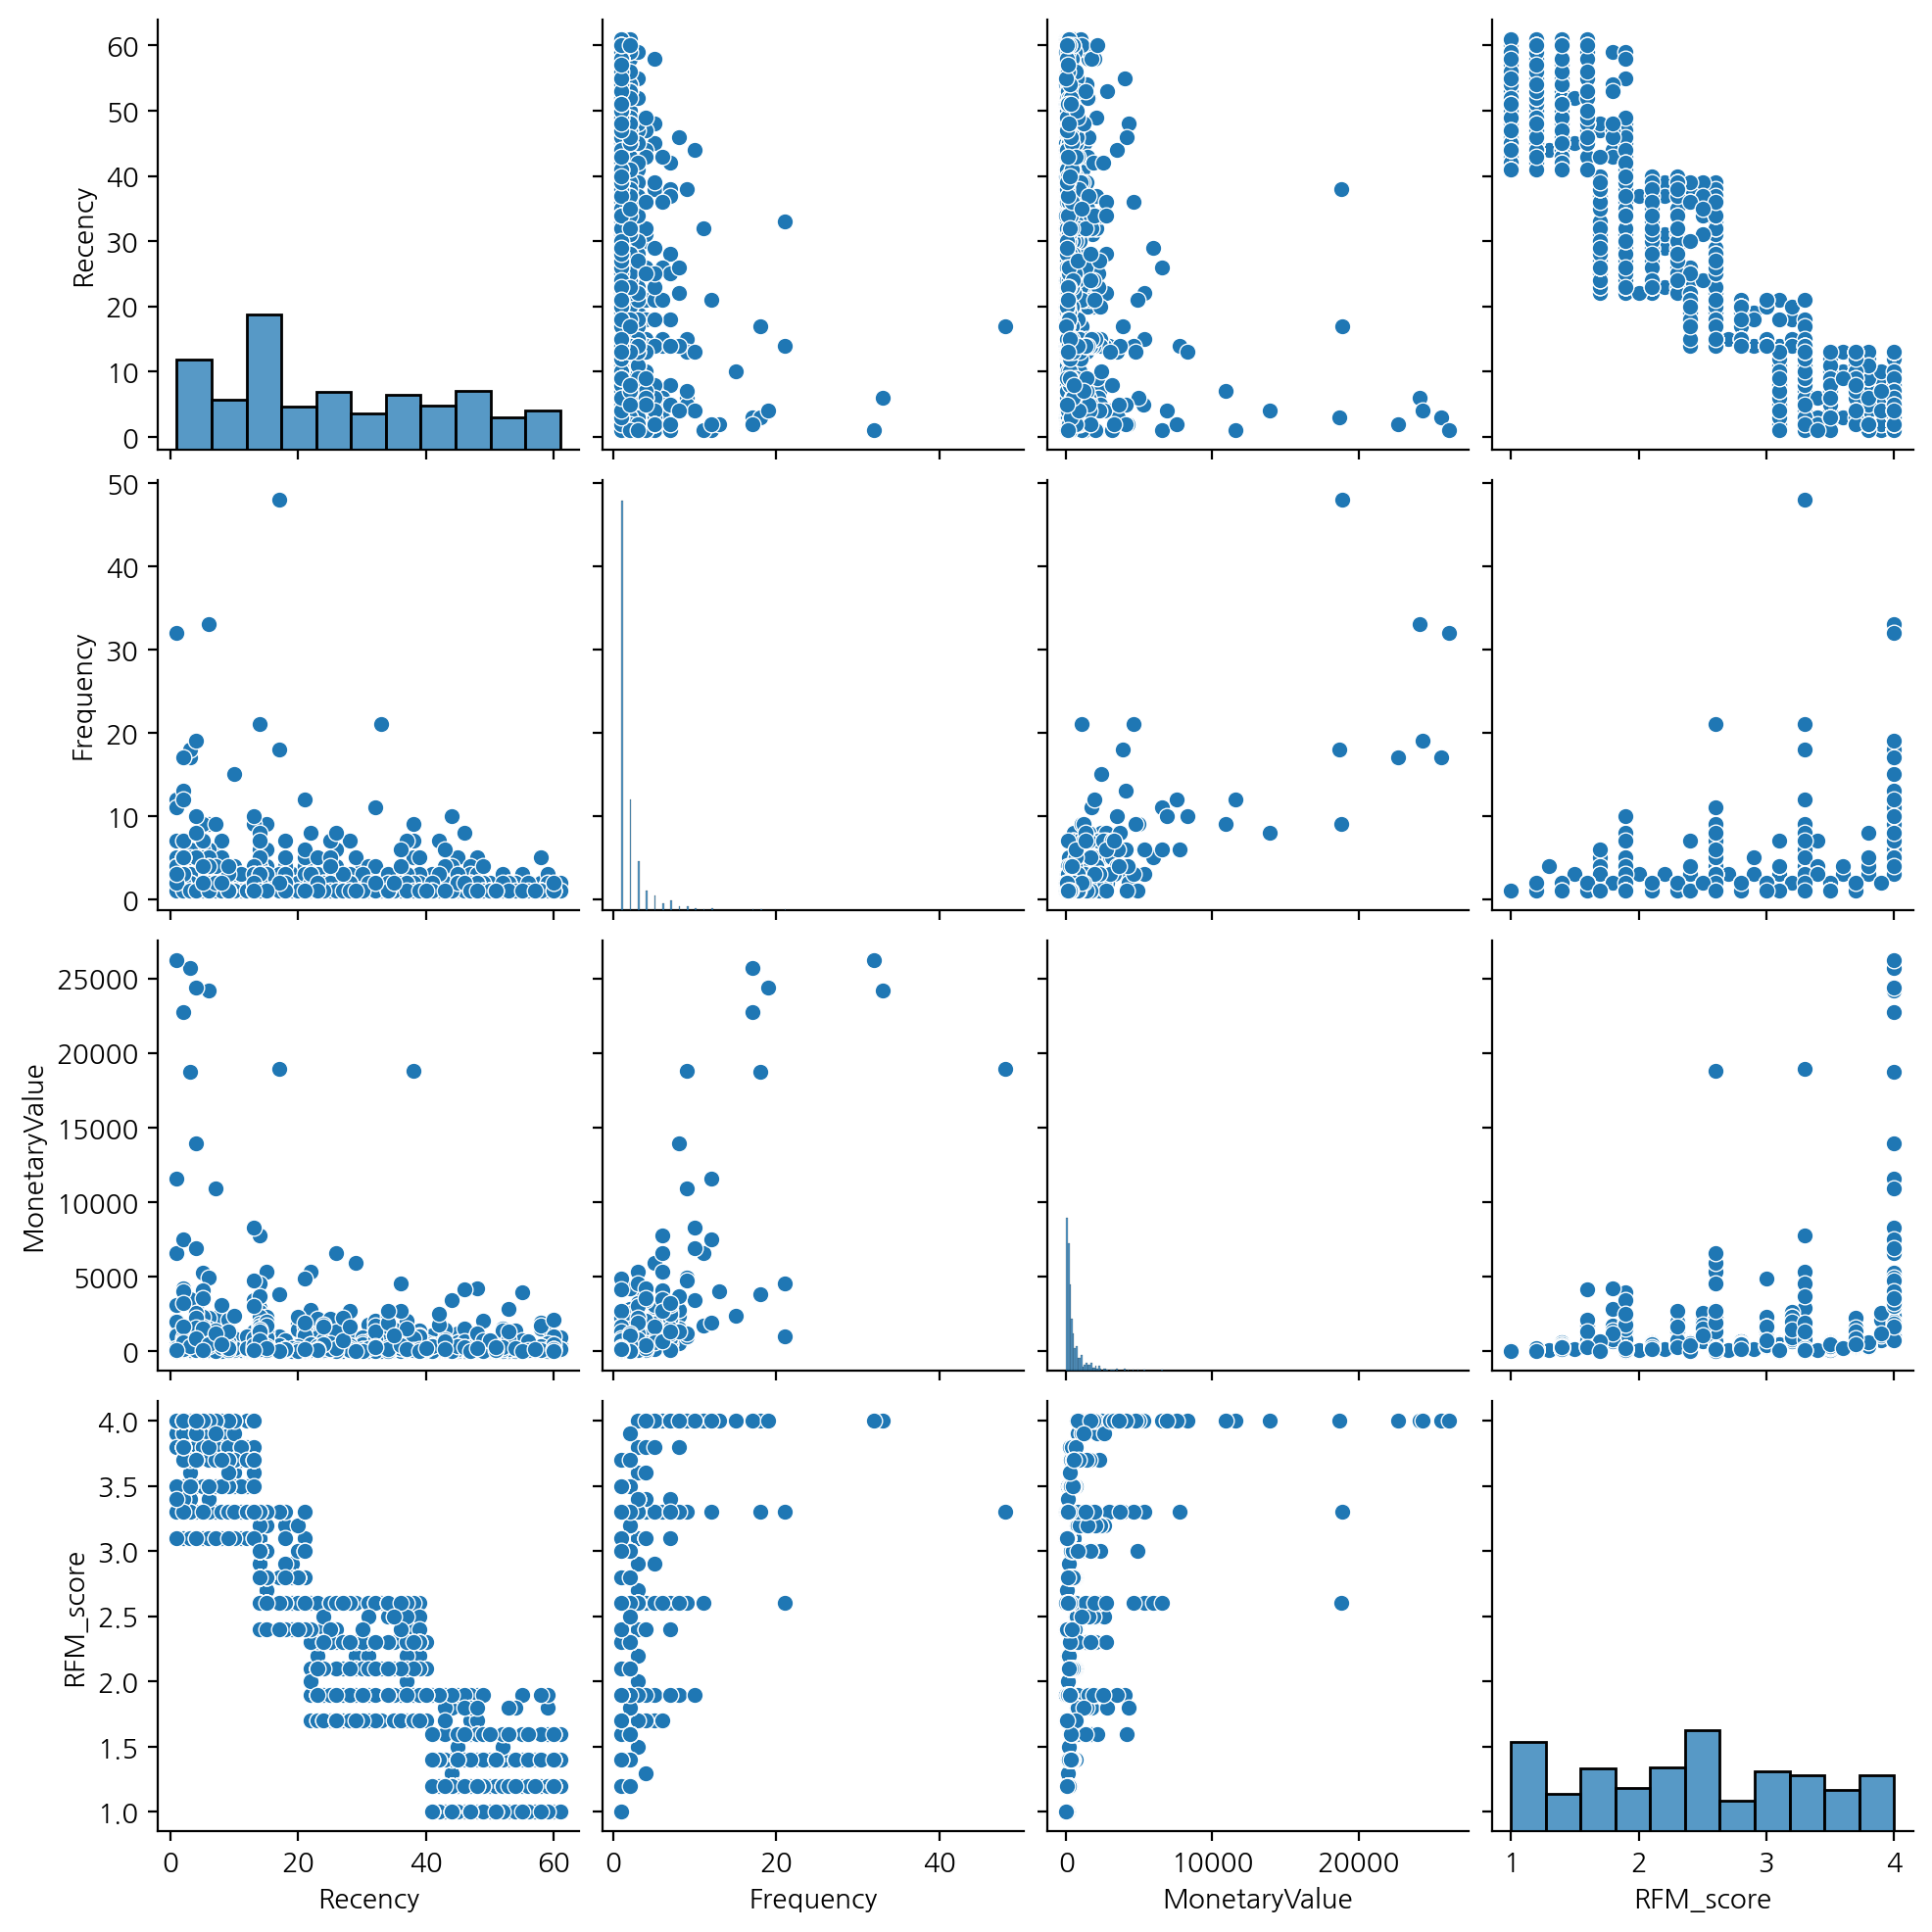

In [127]:
sns.pairplot(data=RFM.sample(1000), diag_kind='hist');

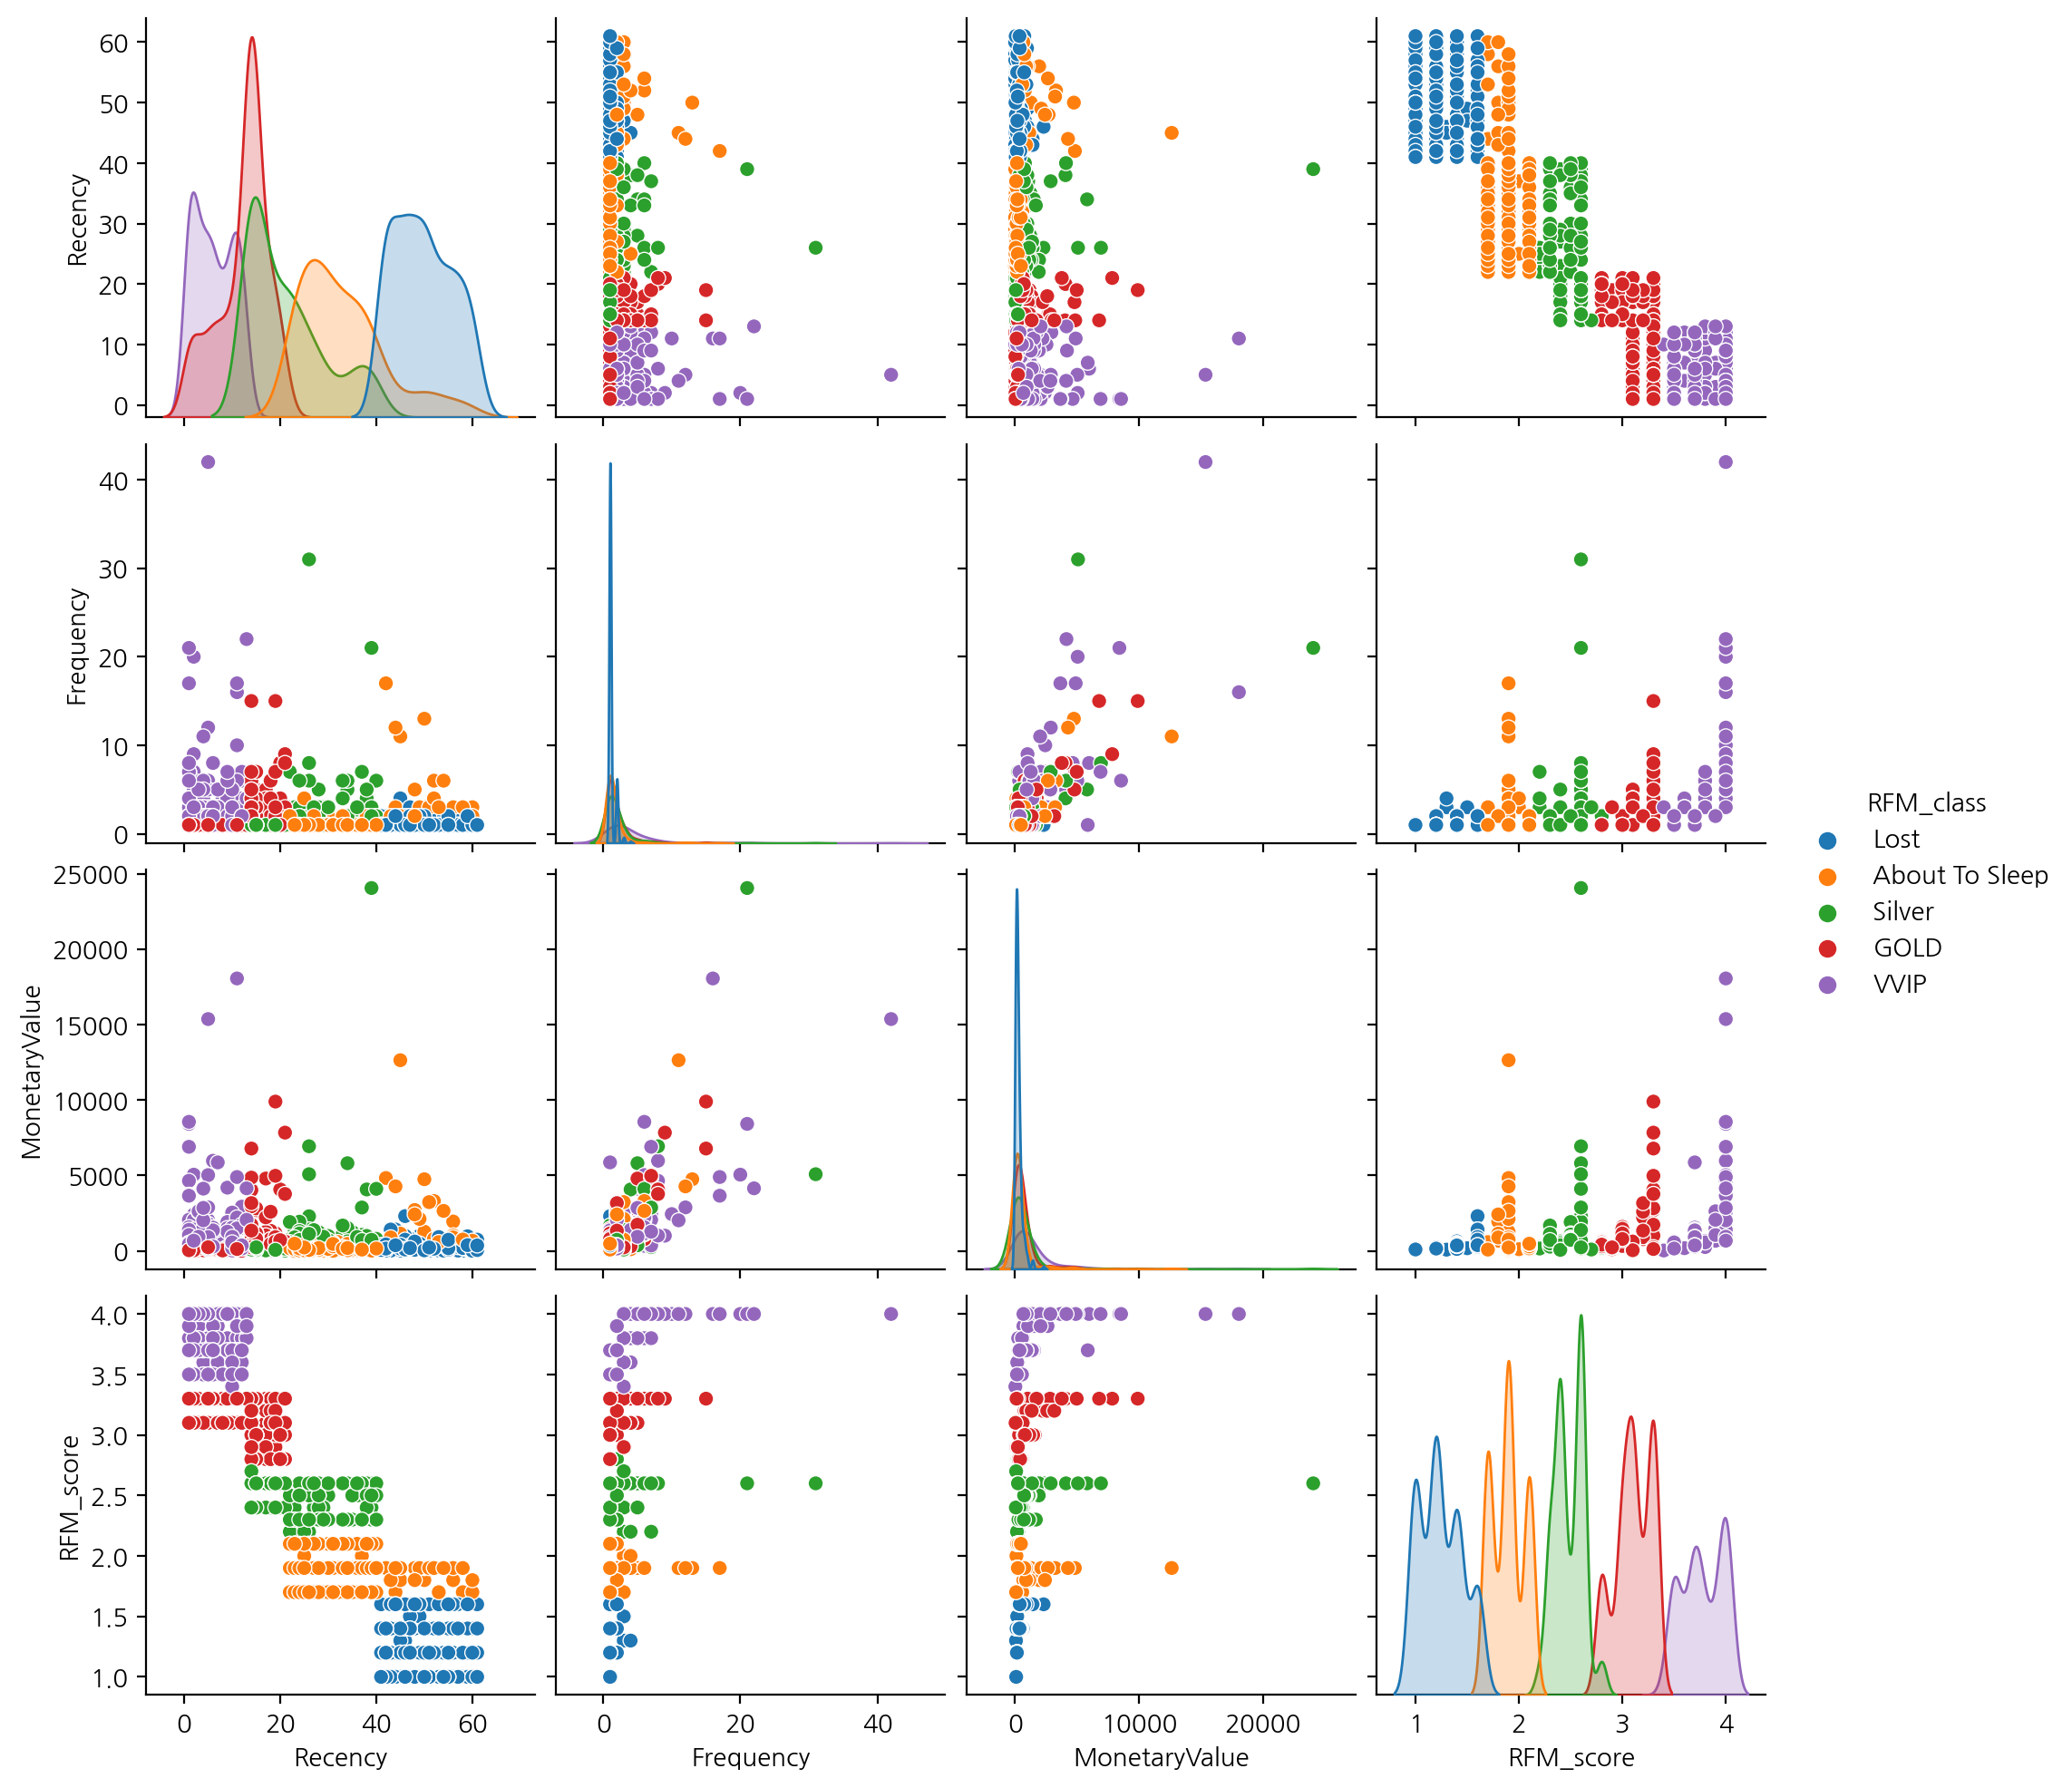

In [128]:
sns.pairplot(data=RFM.sample(1000), hue='RFM_class');

In [132]:
RFM = RFM.drop(columns='RFM_class')

In [133]:
corr_RFM = RFM.corr()
corr_RFM

,Recency,Frequency,MonetaryValue,RFM_score
Recency,1.000000,-0.171355,-0.099076,-0.900555
Frequency,-0.171355,1.000000,0.707260,0.306138
MonetaryValue,-0.099076,0.707260,1.000000,0.211373
RFM_score,-0.900555,0.306138,0.211373,1.000000


In [134]:
mask = np.triu(np.ones_like(corr_RFM))

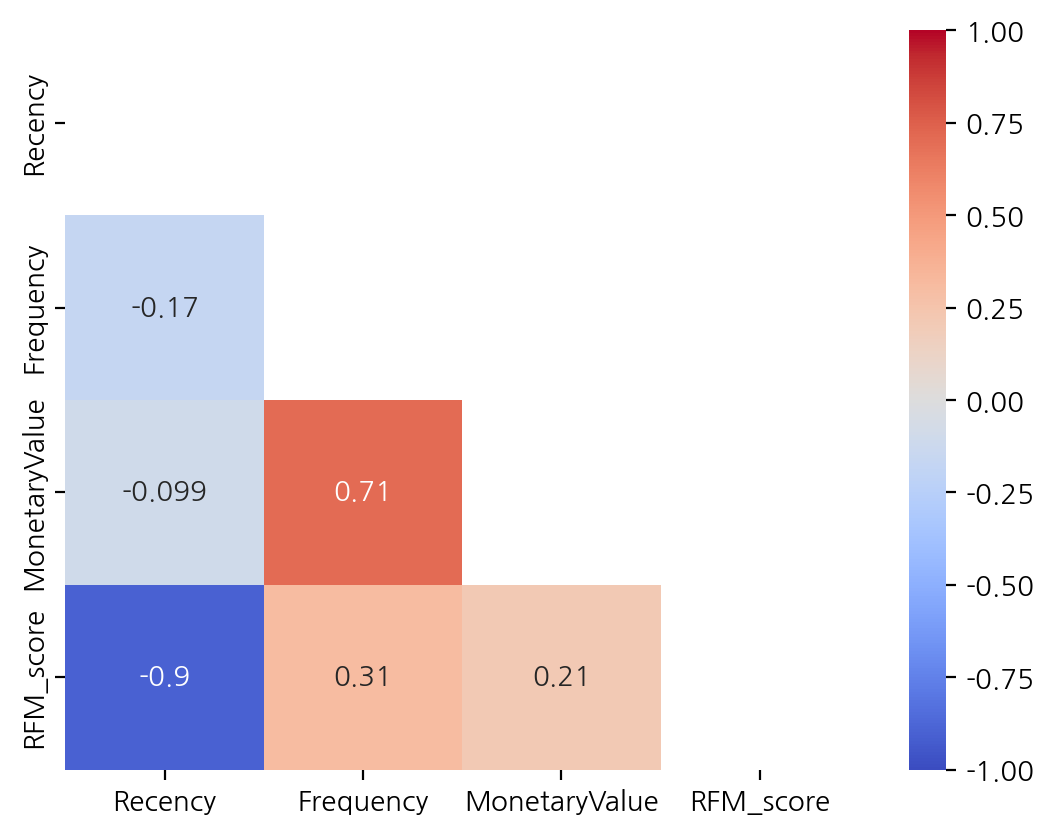

In [135]:
# 상관관계를 열분포 형태의 이미지로 보여주는 heatmap 으로 데이터 시각화합니다.
sns.heatmap(corr_RFM, annot=True, cmap="coolwarm", vmin=-1, vmax=1, mask=mask);

In [136]:
# 컬럼 층위를 제거하고 이름을 다시 붙여봅니다.
RFM_desc.columns = RFM_desc.columns.droplevel()
RFM_desc.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count','Sum']

In [137]:
# 색 팔레트 지정
colors=['red','pink','silver','y','Gold']

### 고객 등급별 매출액

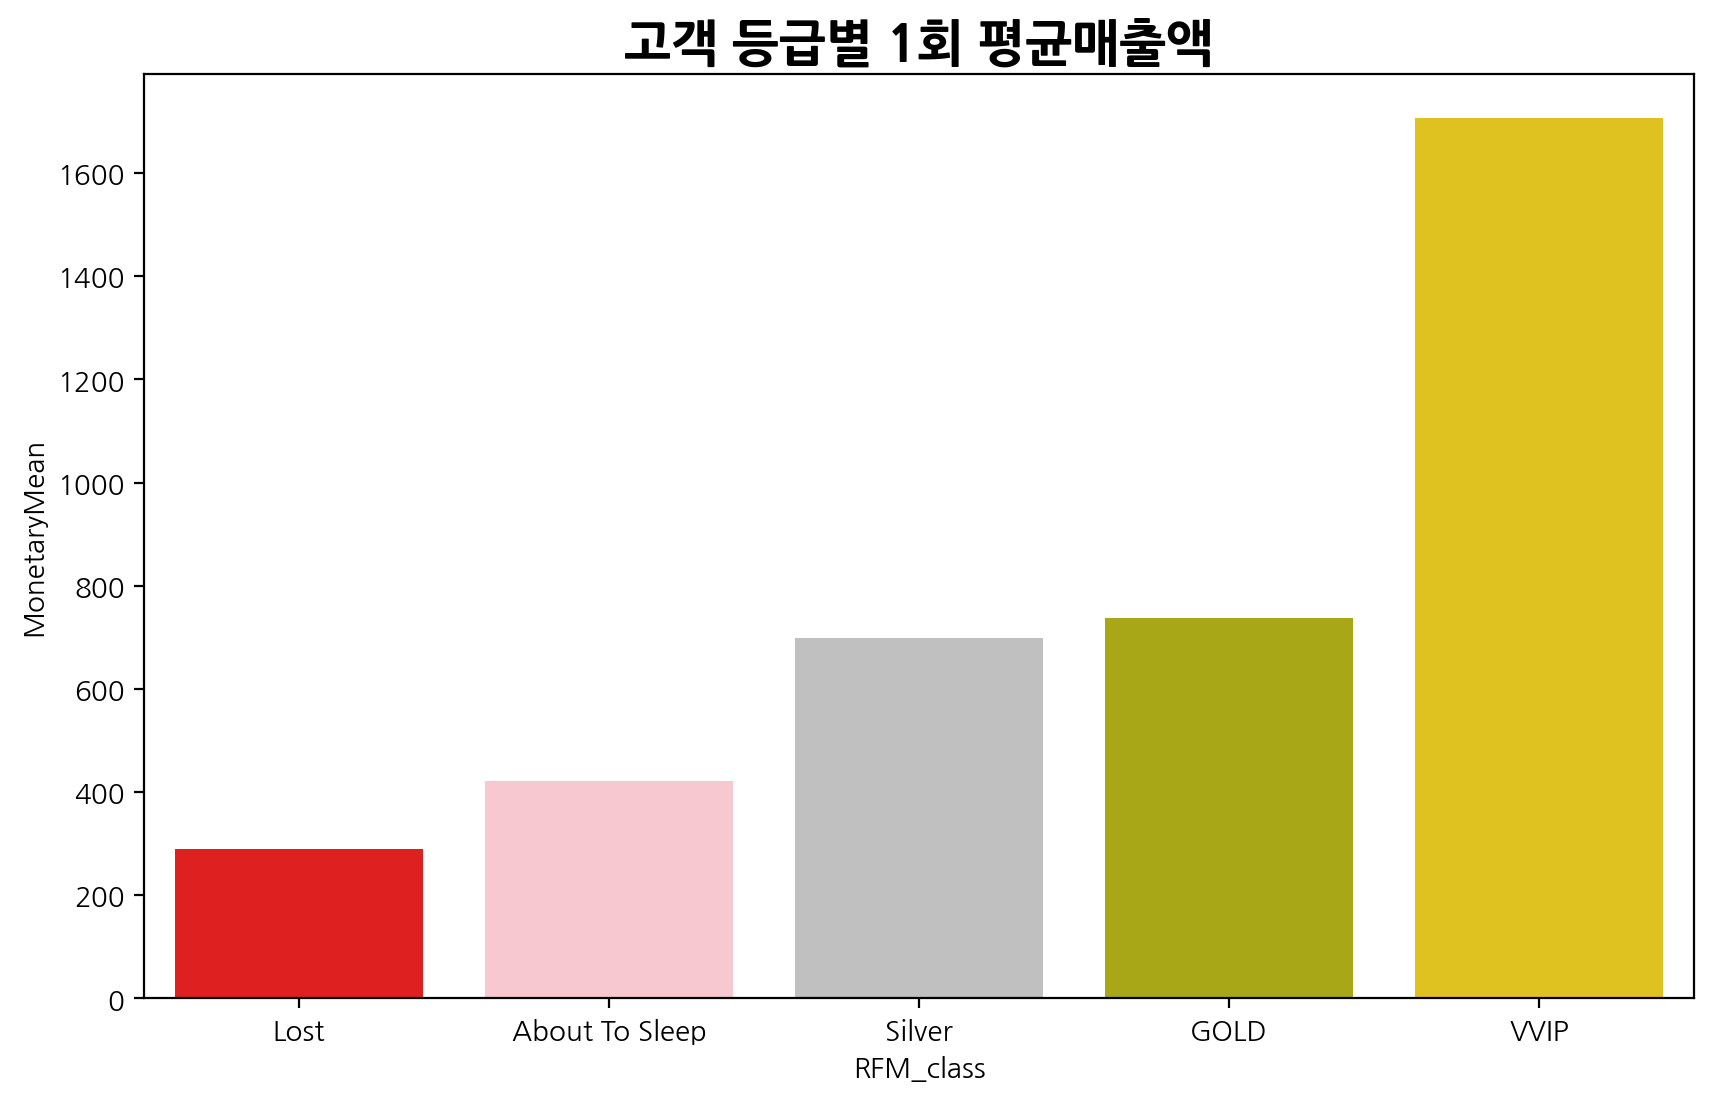

In [138]:
# 고객 등급별 매출 평균
plt.figure(figsize=(10, 6))
sns.set_palette(sns.color_palette(colors))

sns.barplot(data=RFM_desc, x=RFM_desc.index, y='MonetaryMean')
plt.title('고객 등급별 1회 평균매출액', fontsize=18, fontweight='bold');

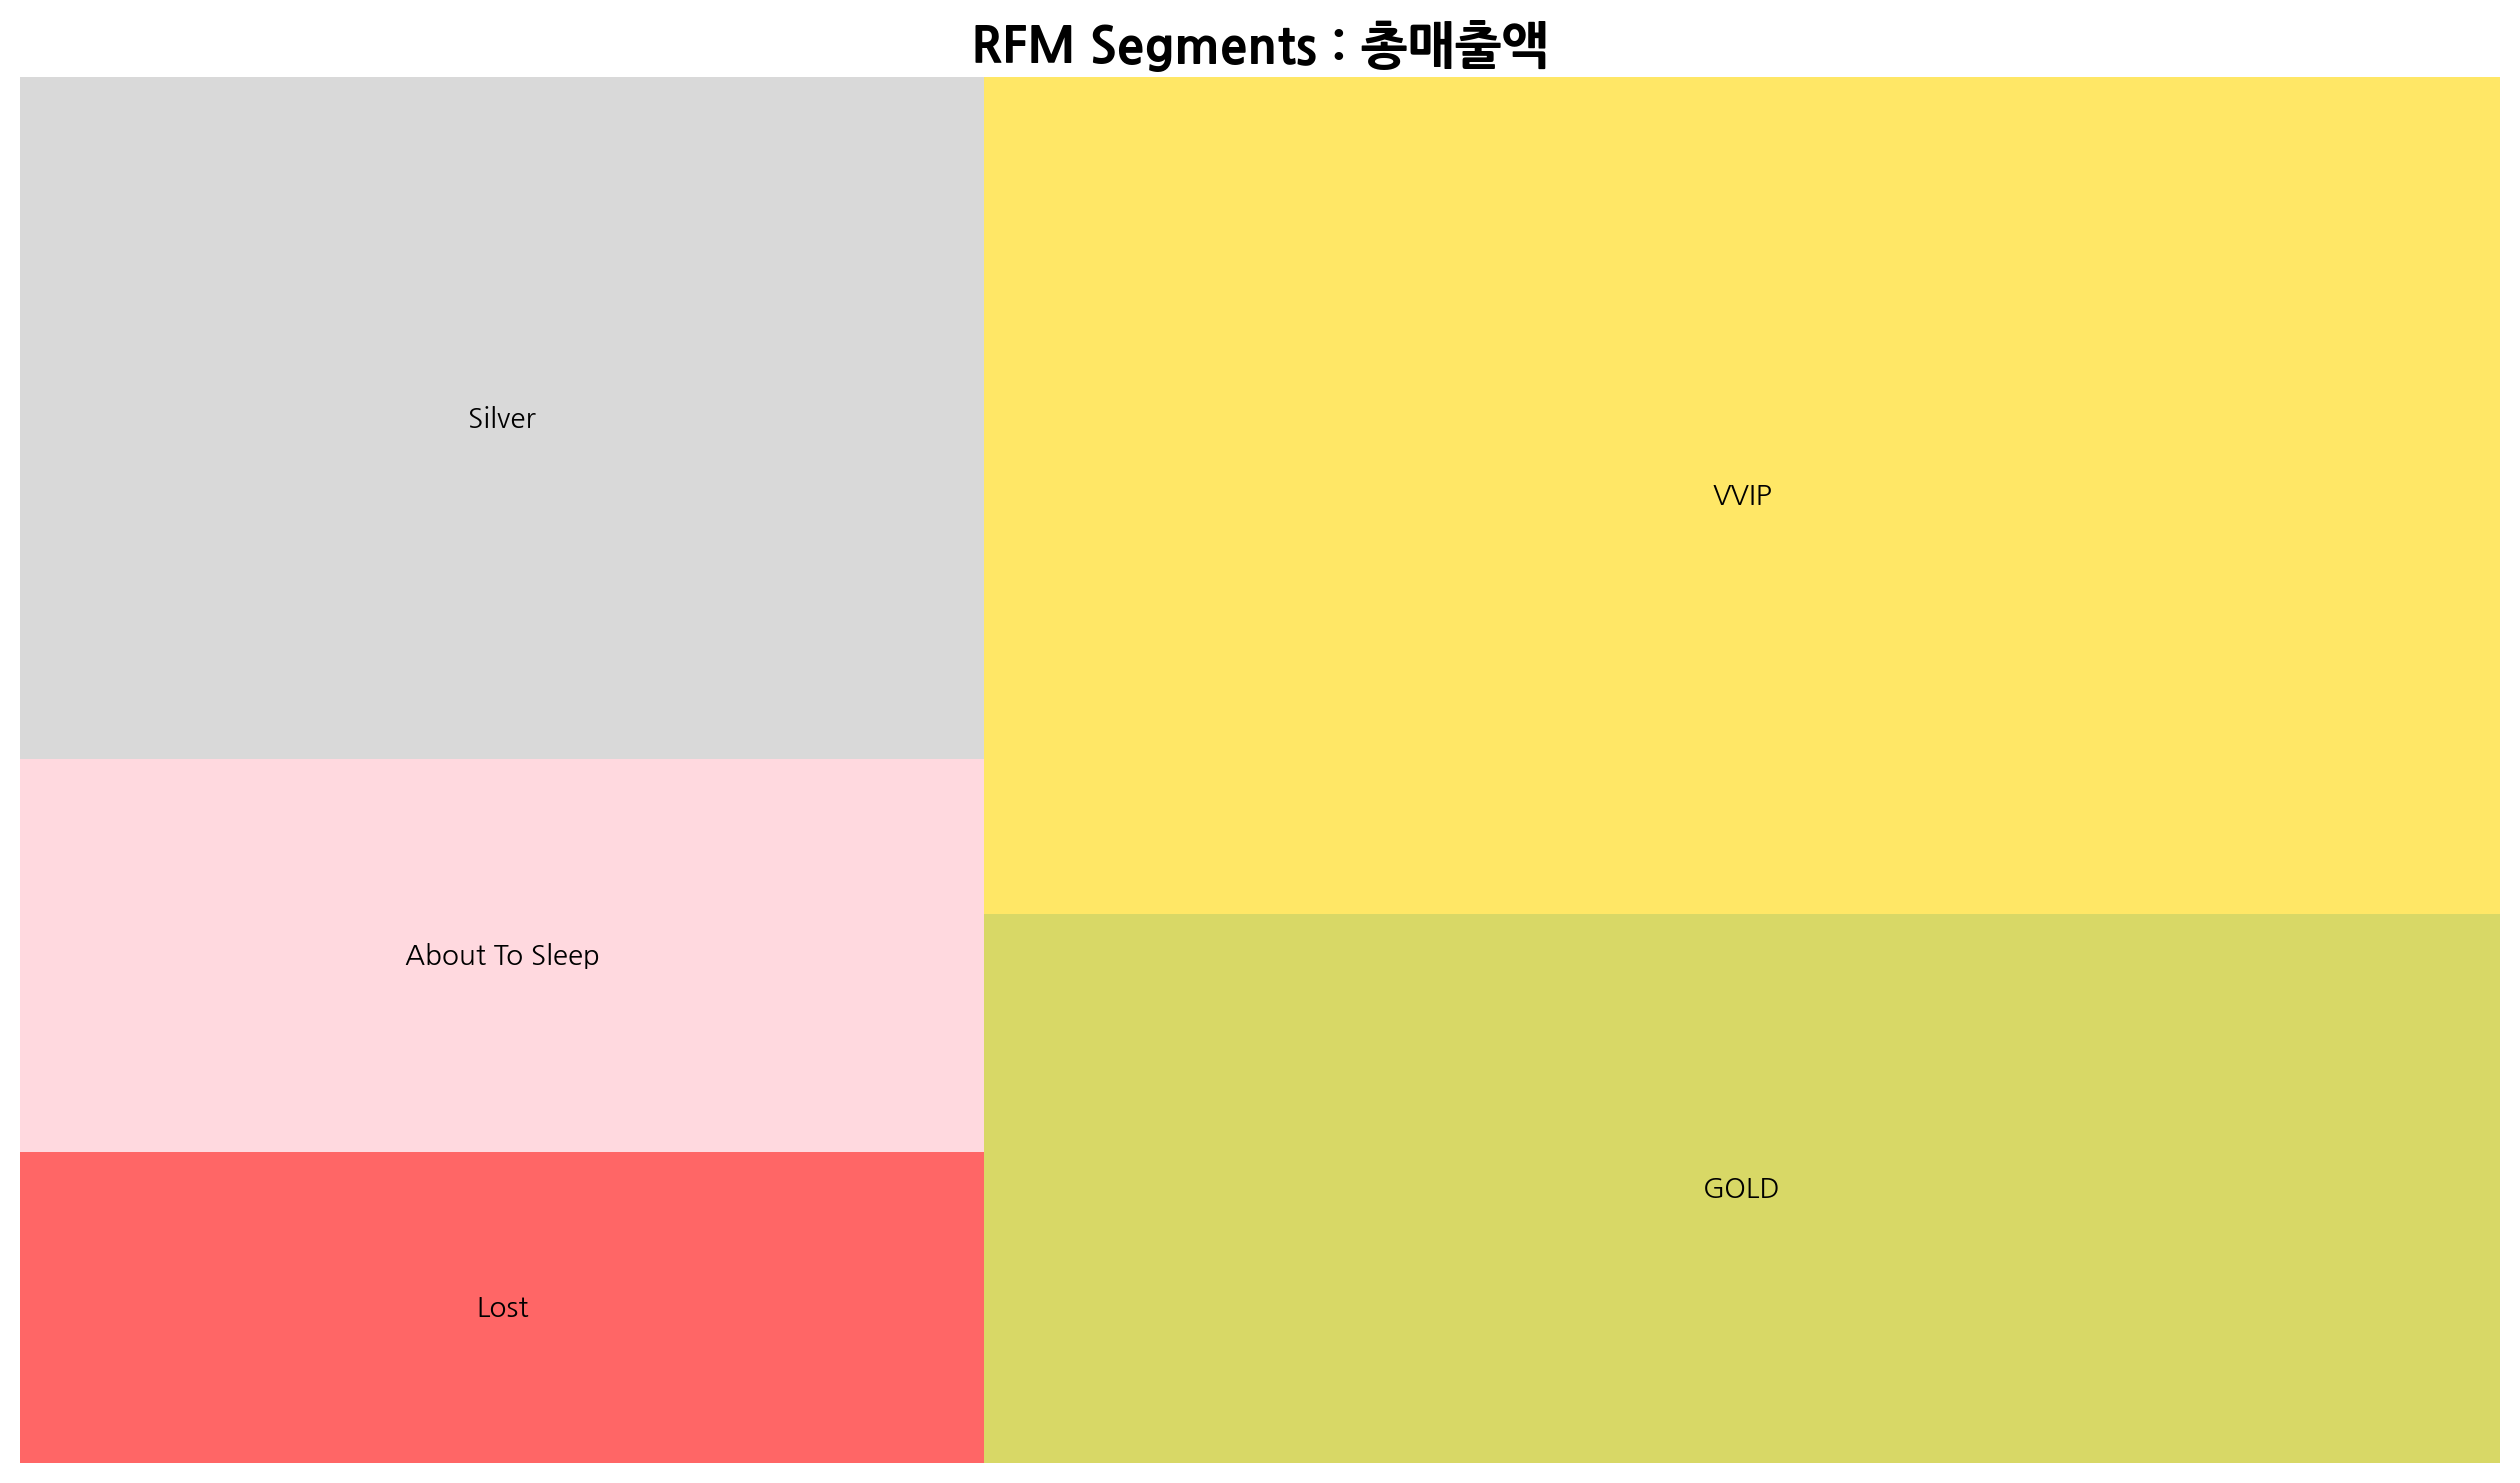

In [139]:
# 그려봅시다
fig = plt.gcf()
ax = fig.add_subplot()
label=['Lost', 'About To Sleep', 'Silver', 'GOLD', 'VVIP']
color=colors

fig.set_size_inches(16, 9)
squarify.plot(sizes=RFM_desc['Sum'], 
              label=label, color=color, alpha=.6 )
plt.title('RFM Segments : 총매출액',fontsize=18, fontweight='bold')
plt.axis('off')
plt.show();

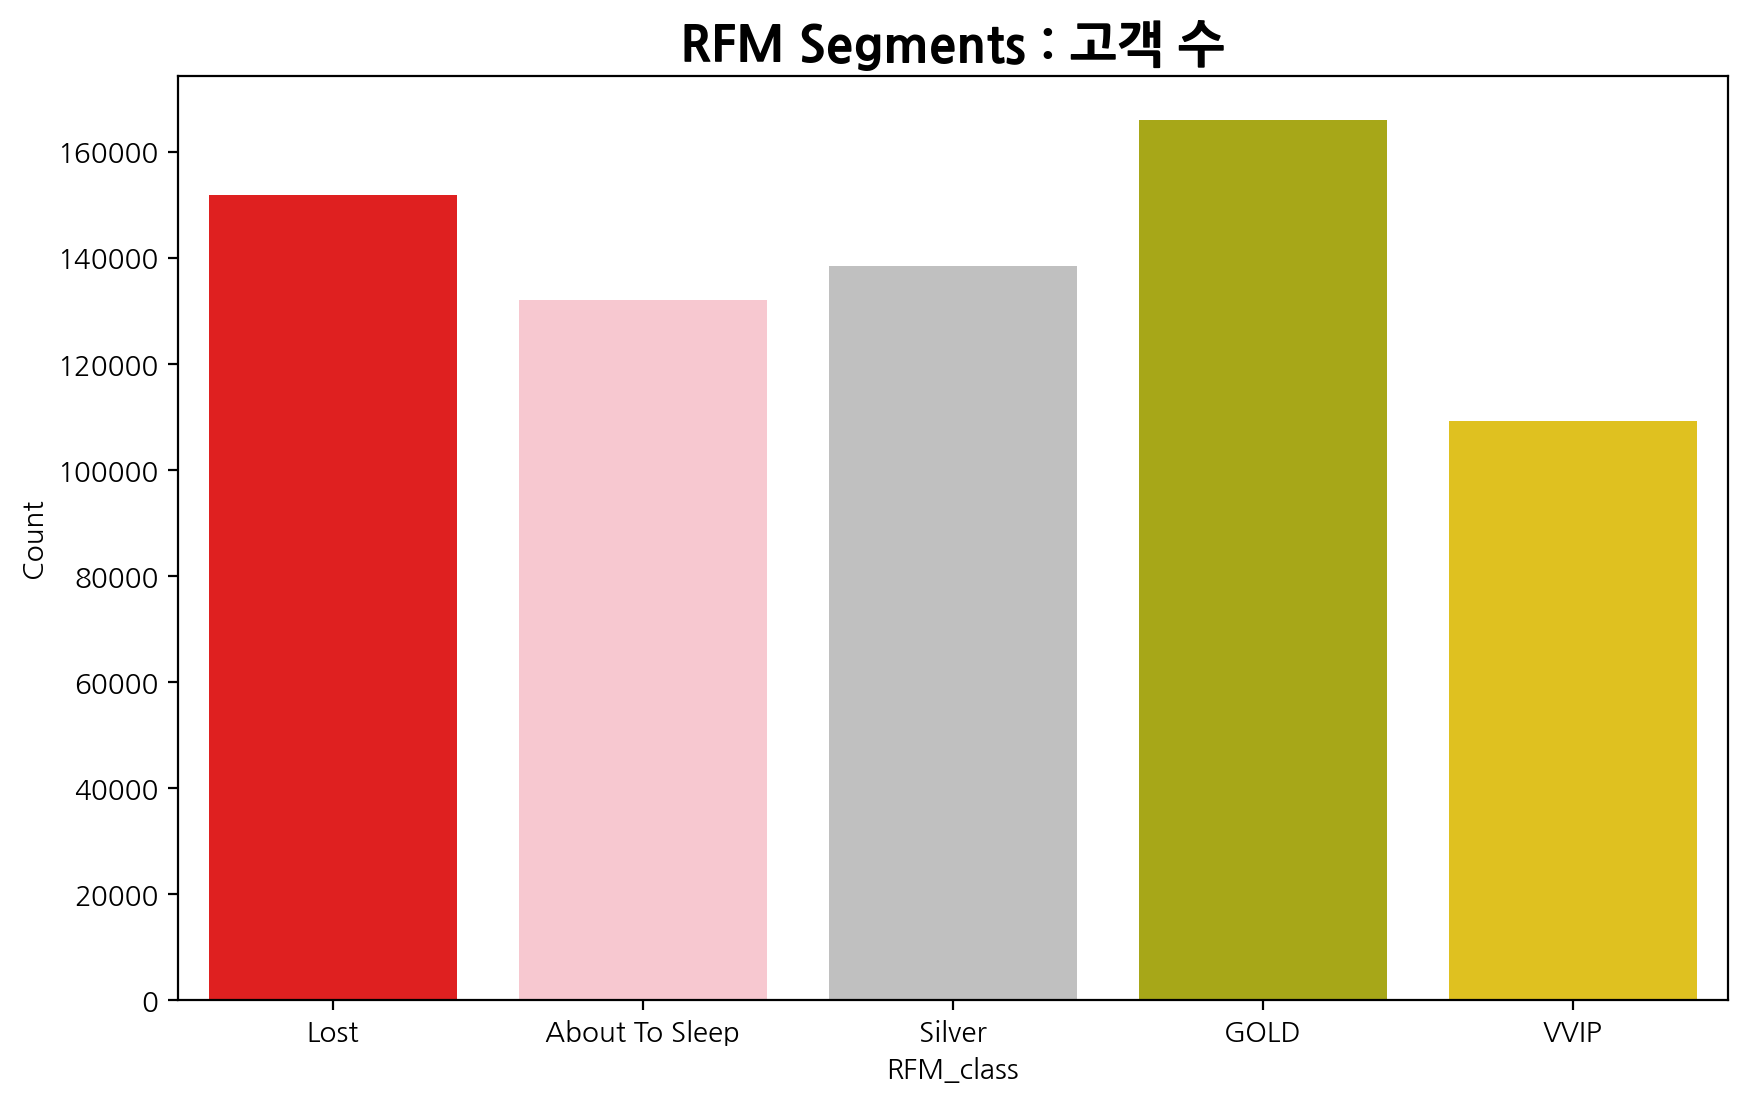

In [140]:
plt.figure(figsize=(10, 6))
sns.set_palette(sns.color_palette(colors))

sns.barplot(data=RFM_desc, x=RFM_desc.index, y='Count')
plt.title('RFM Segments : 고객 수', fontsize=18,fontweight='bold')
plt.show()

## VVIP의 매출 추이

In [141]:
# RFM_class를 user_id 기준으로 user_session 그룹화한 raw 데이터에 추가하기
raw

,Date_order,user_id,Quantity,spent
0,2019-10-06 11:34:30,546521725,1,289.519989
1,2019-10-25 08:39:11,560486342,1,171.899994
2,2019-11-02 08:35:35,563180871,1,123.550003
3,2019-11-11 03:35:34,566954797,1,151.610001
4,2019-10-17 13:37:59,560744406,2,379.779999
...,...,...,...,...
1402753,2019-11-18 11:20:56,519523637,1,45.029999
1402754,2019-11-17 10:59:07,523658055,1,32.150002
1402755,2019-11-25 10:56:59,518862395,2,163.190002
1402756,2019-11-17 05:52:00,571263795,2,66.639999


In [142]:
# id별 class
id_class = rfm[['RFM_class']]
id_class

,RFM_class
user_id,
138340325,Silver
225644257,Silver
253299396,About To Sleep
256164170,GOLD
264649825,About To Sleep
...,...
579962677,VVIP
579963523,VVIP
579964521,VVIP


In [143]:
# 기존 데이터에 클래스 더하기
raw_class = pd.merge(raw, id_class, on='user_id', how='left')
raw_class

,Date_order,user_id,Quantity,spent,RFM_class
0,2019-10-06 11:34:30,546521725,1,289.519989,VVIP
1,2019-10-25 08:39:11,560486342,1,171.899994,Silver
2,2019-11-02 08:35:35,563180871,1,123.550003,Silver
3,2019-11-11 03:35:34,566954797,1,151.610001,GOLD
4,2019-10-17 13:37:59,560744406,2,379.779999,About To Sleep
...,...,...,...,...,...
1402753,2019-11-18 11:20:56,519523637,1,45.029999,VVIP
1402754,2019-11-17 10:59:07,523658055,1,32.150002,Silver
1402755,2019-11-25 10:56:59,518862395,2,163.190002,VVIP
1402756,2019-11-17 05:52:00,571263795,2,66.639999,Silver


In [144]:
# vvip만 뽑아오기
vvip = raw_class[raw_class['RFM_class']=='VVIP']
vvip = vvip.reset_index(drop=True)
vvip

,Date_order,user_id,Quantity,spent,RFM_class
0,2019-10-06 11:34:30,546521725,1,289.519989,VVIP
1,2019-10-23 14:27:08,534210306,2,571.919983,VVIP
2,2019-11-20 14:15:42,573583583,1,138.229996,VVIP
3,2019-11-09 08:57:03,566729291,1,351.100006,VVIP
4,2019-11-18 12:48:57,561759158,2,617.260010,VVIP
...,...,...,...,...,...
439653,2019-11-17 14:47:28,521378371,1,269.970001,VVIP
439654,2019-11-24 08:34:23,513821974,1,977.859985,VVIP
439655,2019-11-28 09:41:58,515196983,2,945.700012,VVIP
439656,2019-11-18 11:20:56,519523637,1,45.029999,VVIP


In [145]:
# 날짜 부분 변경 시간대 제거
vvip['Date_order'] = vvip['Date_order'].dt.strftime('%F')
vvip

,Date_order,user_id,Quantity,spent,RFM_class
0,2019-10-06,546521725,1,289.519989,VVIP
1,2019-10-23,534210306,2,571.919983,VVIP
2,2019-11-20,573583583,1,138.229996,VVIP
3,2019-11-09,566729291,1,351.100006,VVIP
4,2019-11-18,561759158,2,617.260010,VVIP
...,...,...,...,...,...
439653,2019-11-17,521378371,1,269.970001,VVIP
439654,2019-11-24,513821974,1,977.859985,VVIP
439655,2019-11-28,515196983,2,945.700012,VVIP
439656,2019-11-18,519523637,1,45.029999,VVIP


## 일별 vvip 매출액, 구매량, 방문수

In [163]:
vvip_day = vvip.groupby(['Date_order']).agg(매출액=('spent','sum'), 
                                 구매량=('Quantity','sum'),
                                 방문수=('user_id','count'))

vvip_day.head()

,매출액,구매량,방문수
Date_order,,,
2019-10-01,1167559.625,3297,2630
2019-10-02,1182393.000,3408,2707
2019-10-03,1158084.000,3362,2731
2019-10-04,1561786.875,4504,3635
2019-10-05,1314339.500,3711,2954


In [164]:
vvip_day.describe()

,매출액,구매량,방문수
count,6.000000e+01,60.000000,60.000000
mean,3.107434e+06,9121.433333,7327.633333
std,2.541130e+06,7411.689625,5843.865008
min,1.158084e+06,3297.000000,2630.000000
25%,1.624962e+06,4861.000000,3909.500000
50%,1.914293e+06,5409.500000,4377.500000
75%,3.139587e+06,9058.250000,7057.750000
max,1.328870e+07,38799.000000,28340.000000


In [165]:
q1 = vvip_day['방문수'].quantile(0.25)
q2 = vvip_day['방문수'].quantile(0.5)
q3 = vvip_day['방문수'].quantile(0.75)
iqr = q3 - q1
iqr

outliers_vip = vvip_day[['방문수']][(vvip_day['방문수'] < (q1 - 1.5 * iqr)) | (vvip_day['방문수'] > (q3 + 1.5 * iqr))]
outliers_vip.sort_values(by=['방문수'])

,방문수
Date_order,
2019-11-23,14248
2019-11-24,14693
2019-11-22,15379
2019-11-26,15419
2019-11-28,15679
2019-11-27,15746
2019-11-25,15814
2019-11-21,15930
2019-11-20,16122


In [166]:
vvip_day = vvip_day[vvip_day['방문수'] < 3237]
vvip_day.head()

,매출액,구매량,방문수
Date_order,,,
2019-10-01,1167559.625,3297,2630
2019-10-02,1182393.000,3408,2707
2019-10-03,1158084.000,3362,2731
2019-10-05,1314339.500,3711,2954
2019-10-06,1247163.000,3503,2821


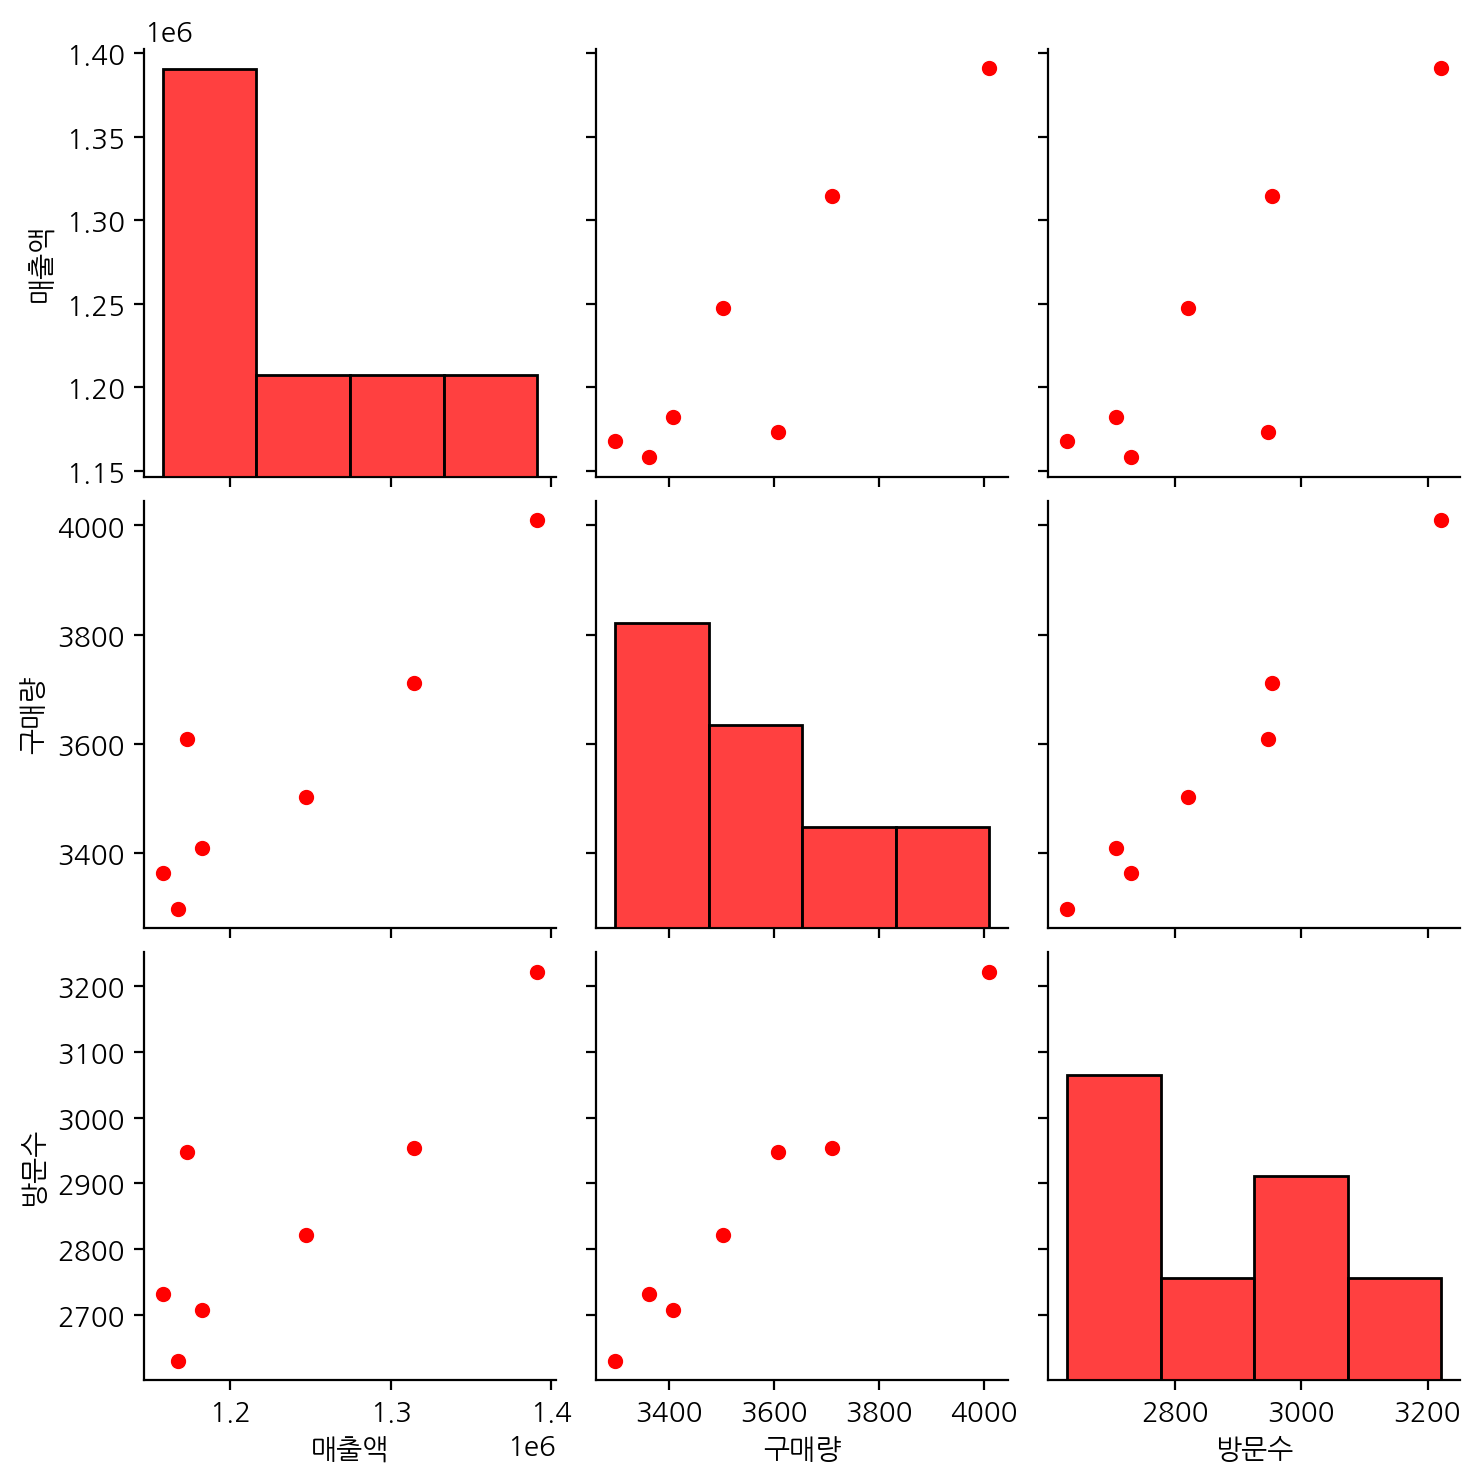

In [167]:
sns.pairplot(vvip_day, diag_kind='hist');

In [168]:
vvip_day[vvip_day['매출액'] == vvip_day['매출액'].max()]

,매출액,구매량,방문수
Date_order,,,
2019-10-10,1391143.375,4010,3222


In [169]:
vvip_day

,매출액,구매량,방문수
Date_order,,,
2019-10-01,1167559.625,3297,2630
2019-10-02,1182393.000,3408,2707
2019-10-03,1158084.000,3362,2731
2019-10-05,1314339.500,3711,2954
2019-10-06,1247163.000,3503,2821
2019-10-07,1173252.750,3608,2947
2019-10-10,1391143.375,4010,3222


In [172]:
vvip_day = vvip_day[vvip_day['방문수'] < 3000]
vvip_day.head()

,매출액,구매량,방문수
Date_order,,,
2019-10-01,1167559.625,3297,2630
2019-10-02,1182393.000,3408,2707
2019-10-03,1158084.000,3362,2731
2019-10-05,1314339.500,3711,2954
2019-10-06,1247163.000,3503,2821


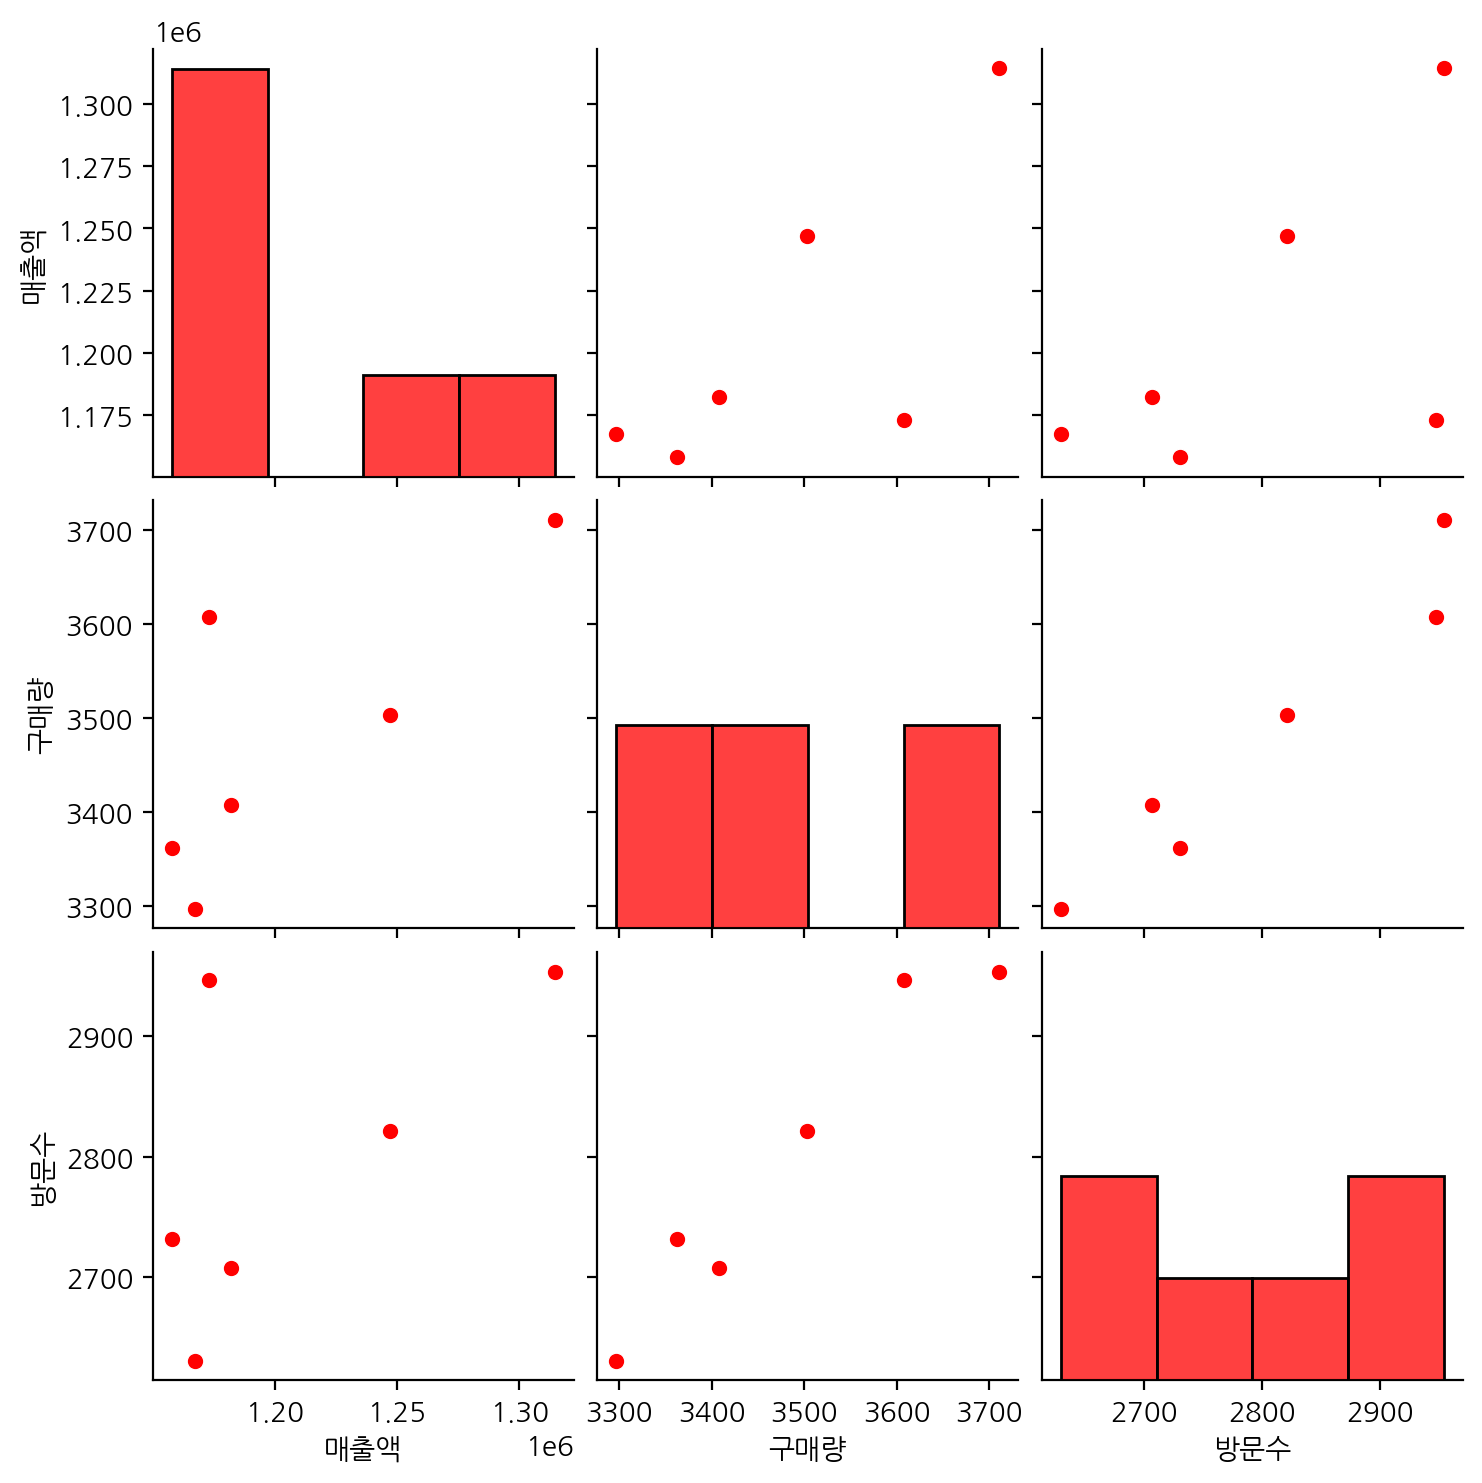

In [173]:
sns.pairplot(vvip_day, diag_kind='hist');